In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import geopandas as gpd
import xgboost
import sys
from sklearn.preprocessing import LabelEncoder
import numpy as np
from math import * 
from tqdm import tqdm
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.cluster import DBSCAN, OPTICS
from xgboost import XGBClassifier
from sklearn.preprocessing import PolynomialFeatures

import json
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
plt.style.use('dark_background')

from utils import plot_cluster, load_list, save_list, load_data, load_data_test


In [3]:
X, Y = load_data(add_knn_mean=True,
                 add_knn_concat=True,
                 add_dates=True,
                 add_polynomial=False,
                 n_data_max=9999999999,
                 shuffle = True)

X_target = load_data_test(add_knn_mean=True,
                 add_knn_concat=True,
                 add_dates=True,
                 n_data_max=99999999,
                 shuffle = False)

print(f'Datas containing NA loaded: {len(X[X.isna().any(axis = 1)])}')


Loading data...


c:\Users\timot\MLcompetition\utils.py:57: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = train_df.drop("change_type", 1)



Basic features lenght: 310006
knn mean features lenght: 310006
knn concat features lenght: 310006
Dates features lenght: 310006
X_train and Y_train loaded.
Loading data...

Basic features lenght: 121704
knn mean features lenght: 121704
knn concat features lenght: 121704
Dates features lenght: 121704
X_val loaded.
Datas containing NA loaded: 0


Feature: change_status_date1


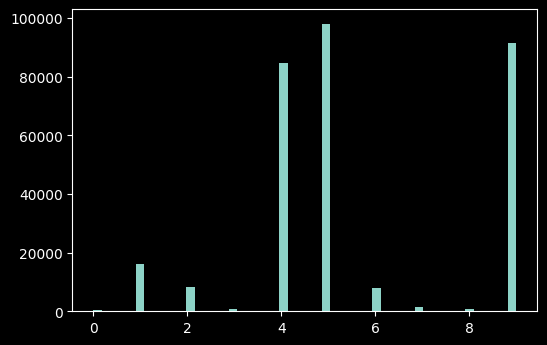

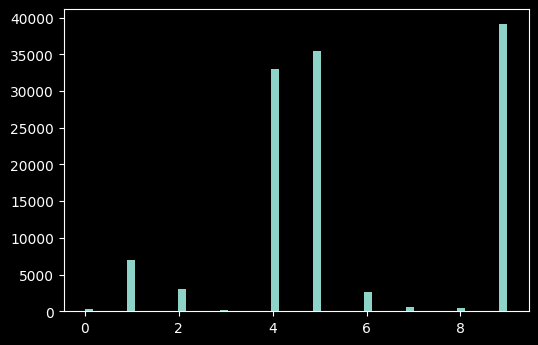

Feature: change_status_date2


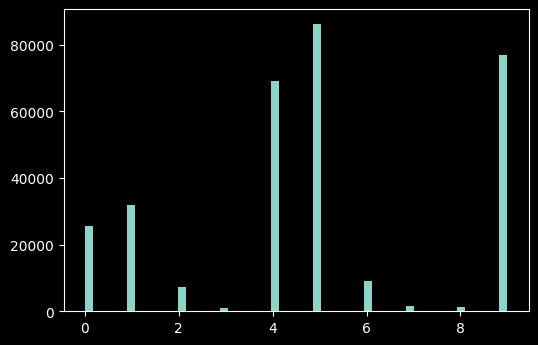

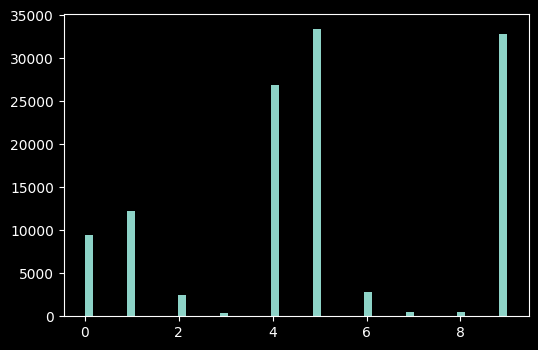

Feature: change_status_date3


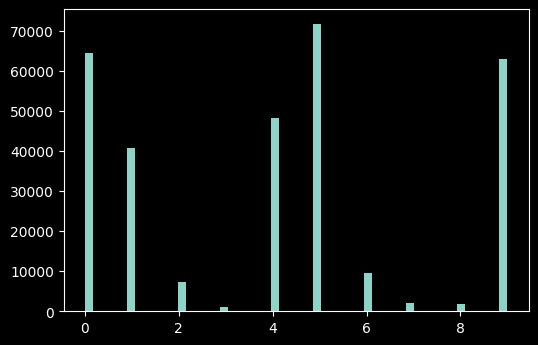

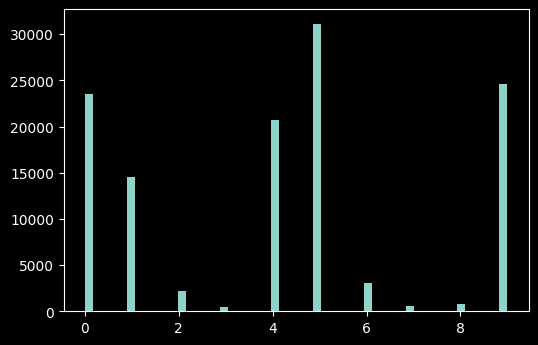

Feature: change_status_date4


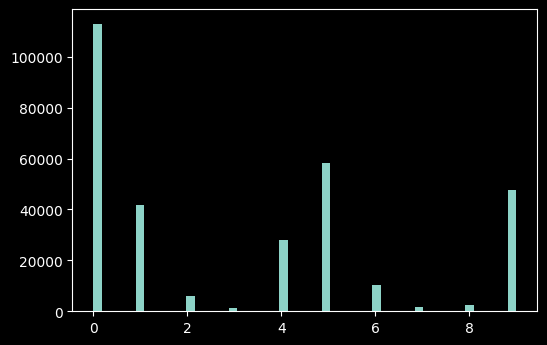

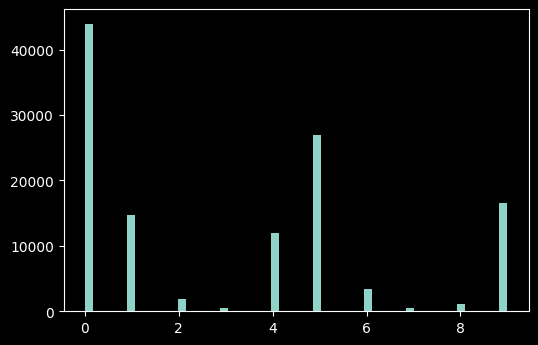

Feature: change_status_date5


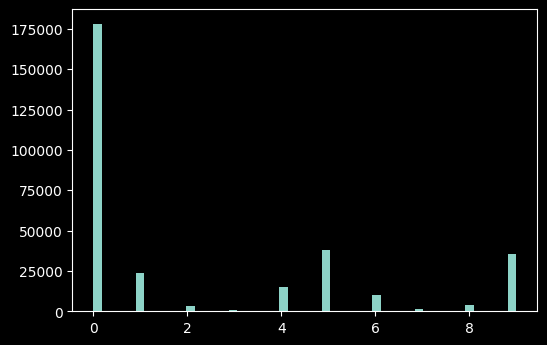

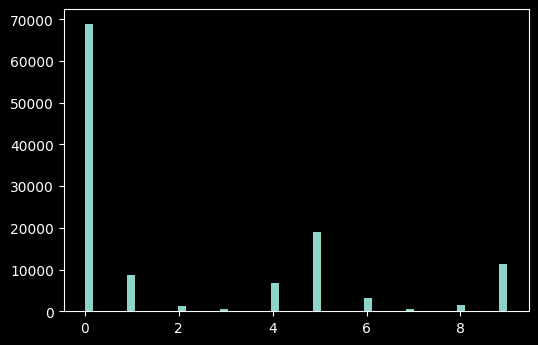

Feature: diff1


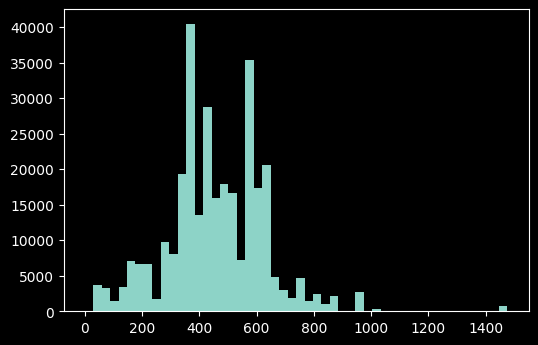

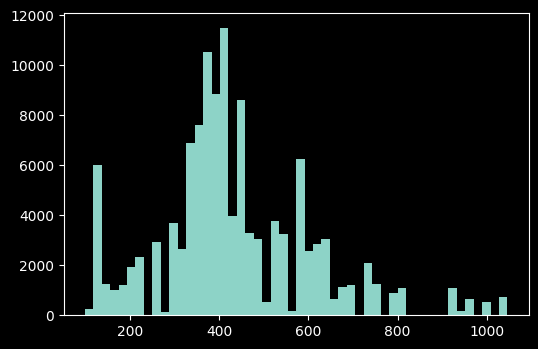

Feature: diff2


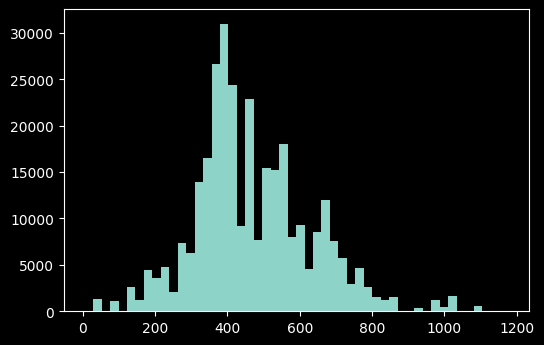

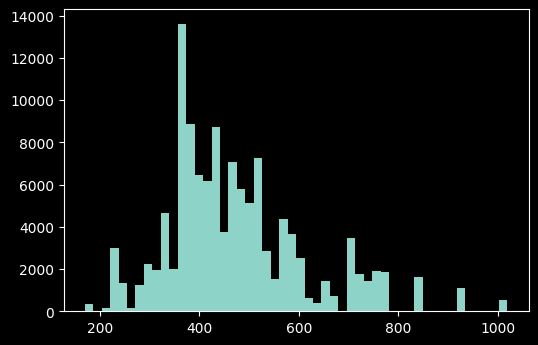

Feature: diff3


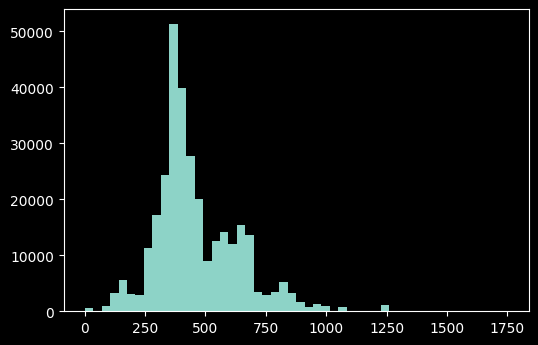

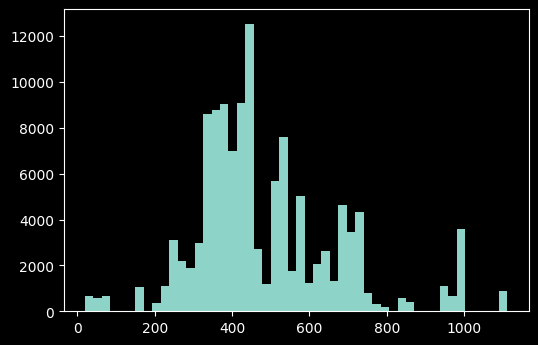

Feature: diff4


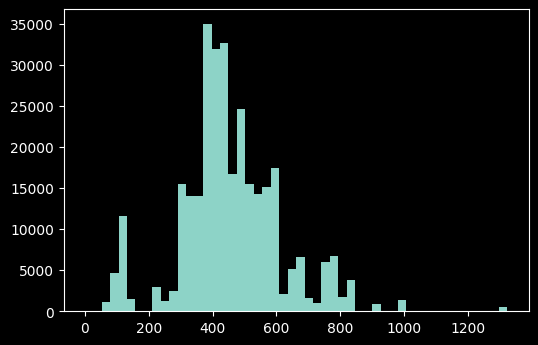

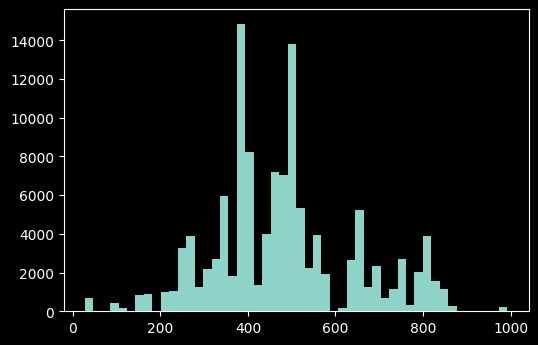

Feature: year_date1


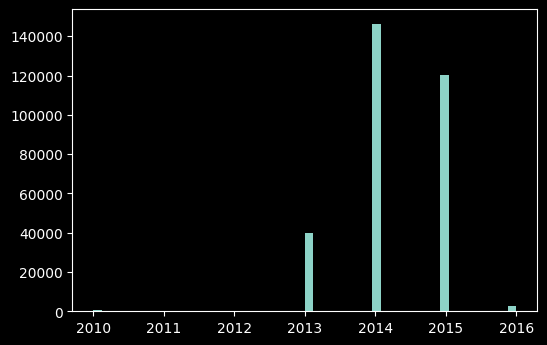

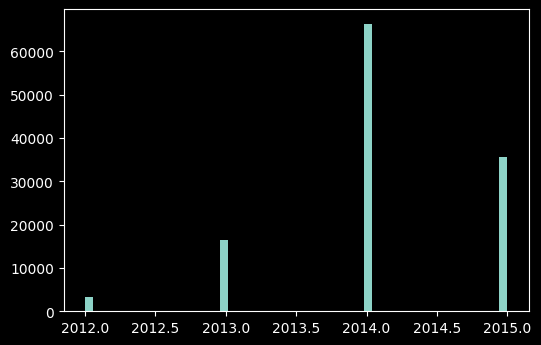

Feature: year_date2


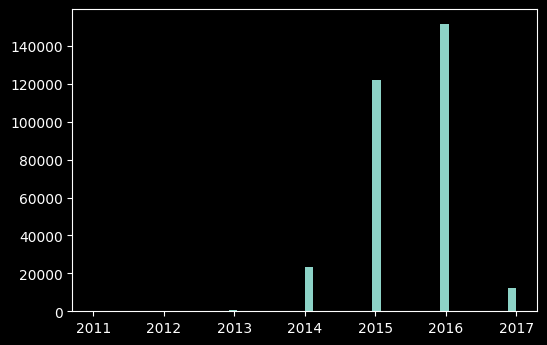

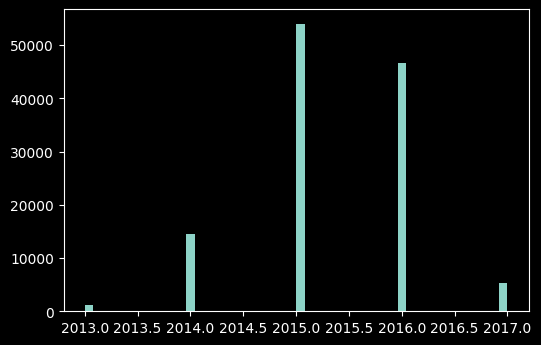

Feature: year_date3


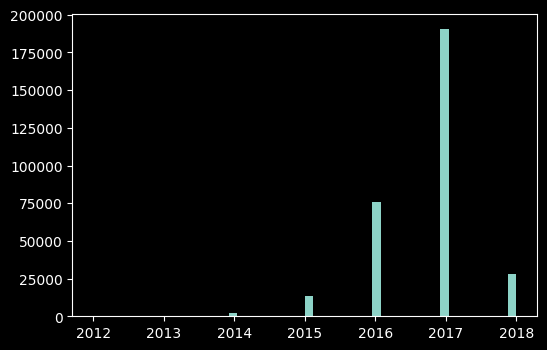

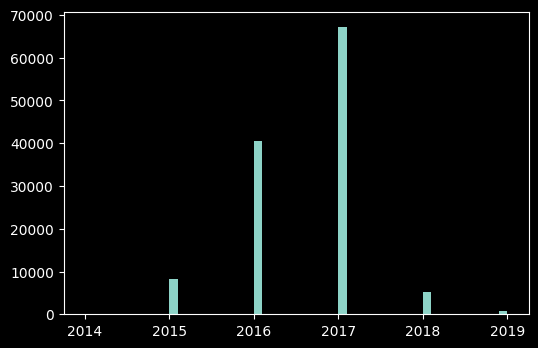

Feature: year_date4


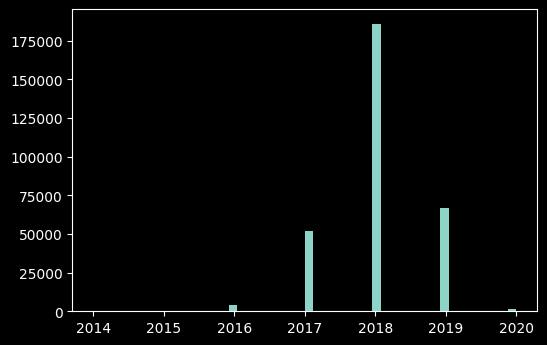

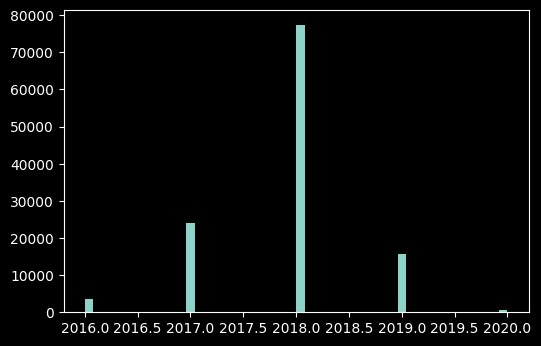

Feature: year_date5


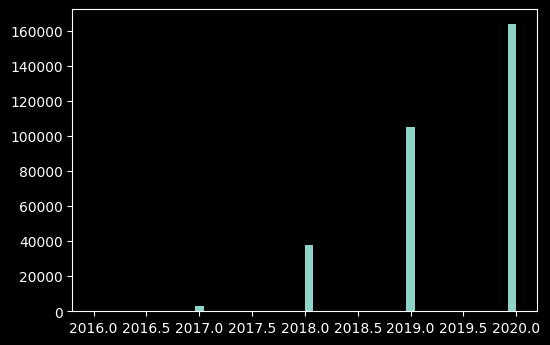

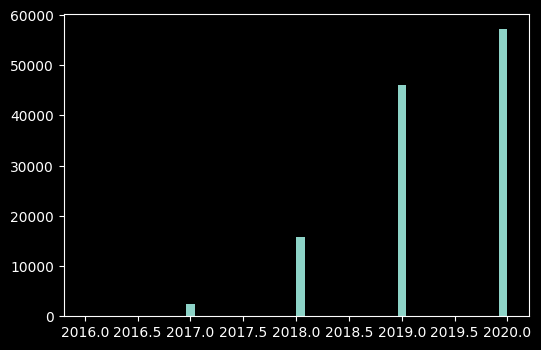

Feature: area


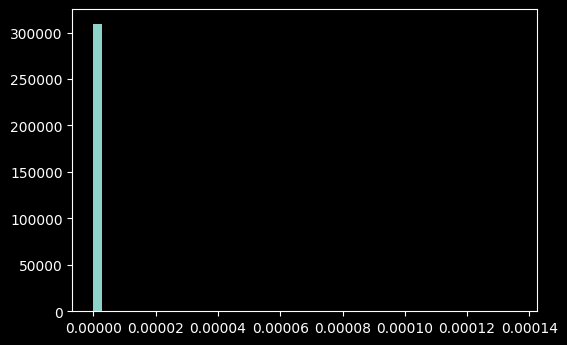

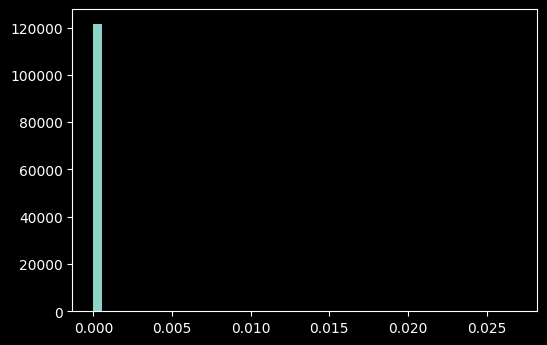

Feature: length


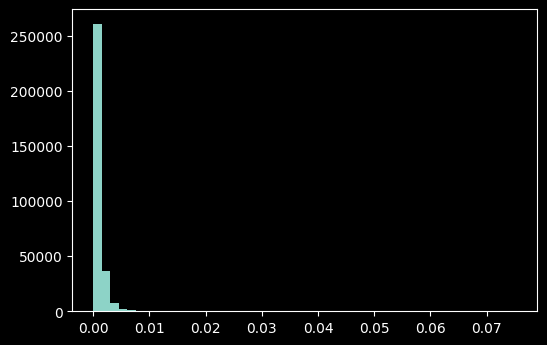

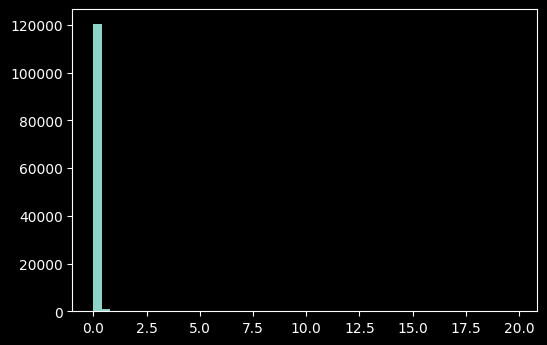

Feature: area/length**2


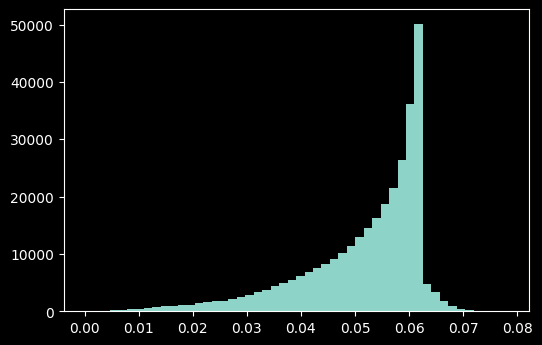

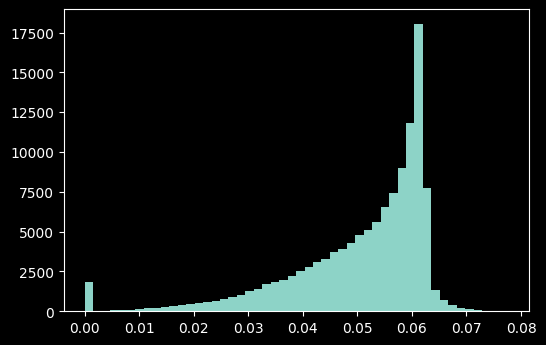

Feature: elongation


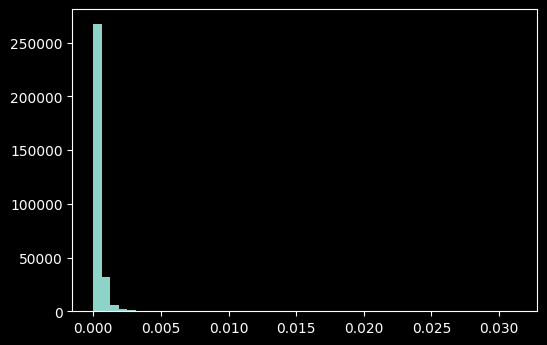

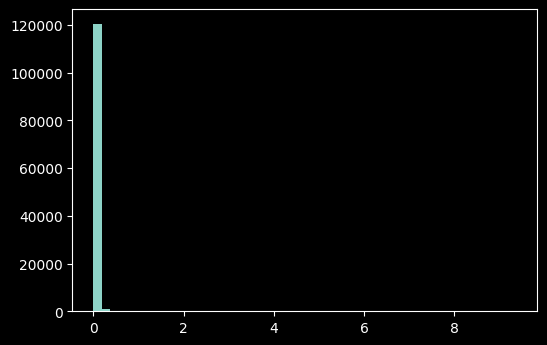

Feature: centroid_x


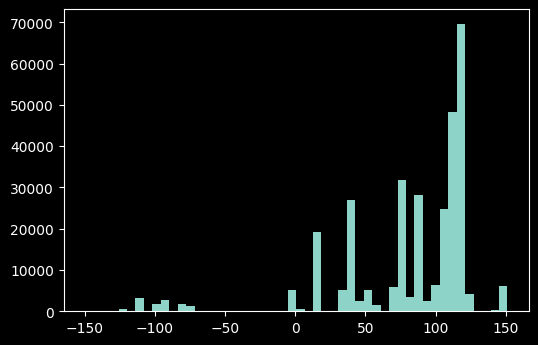

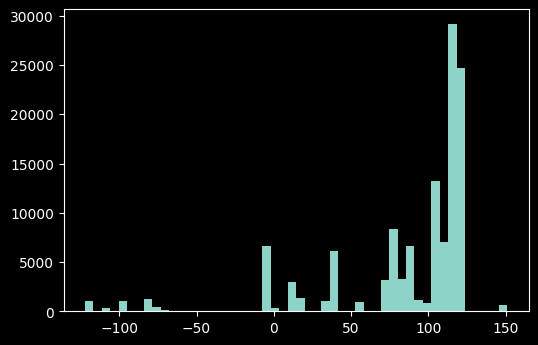

Feature: centroid_y


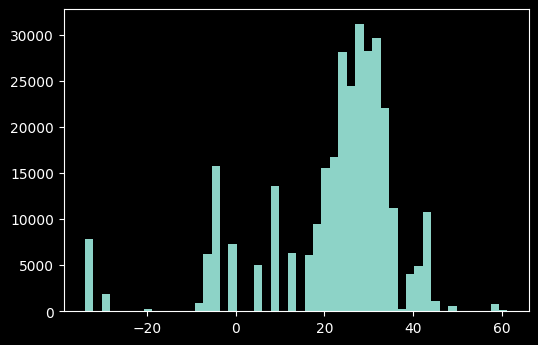

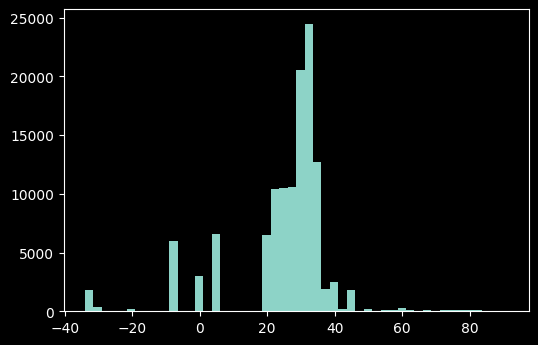

Feature: height


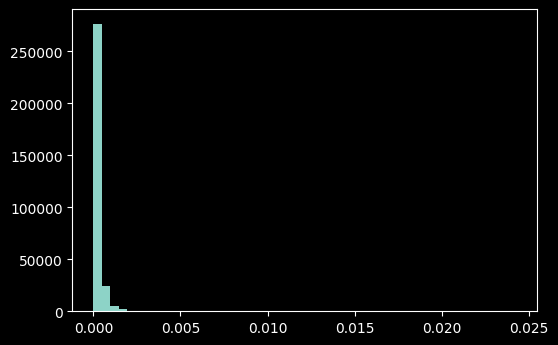

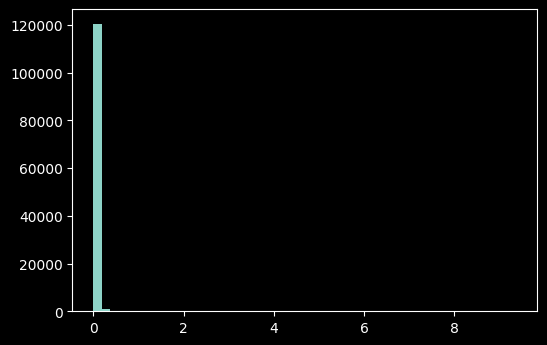

Feature: width


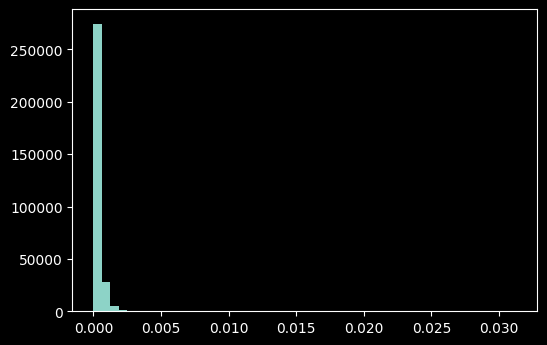

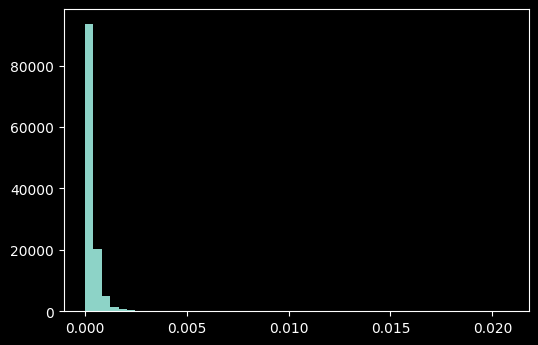

Feature: nb_points


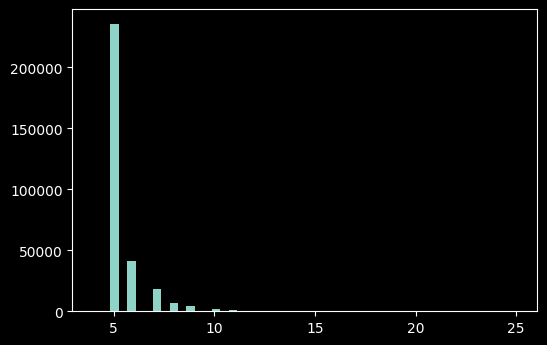

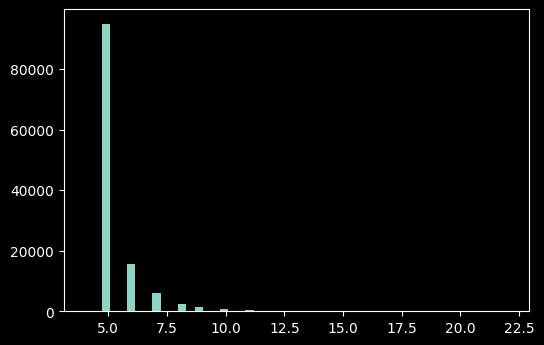

Feature: diff_area


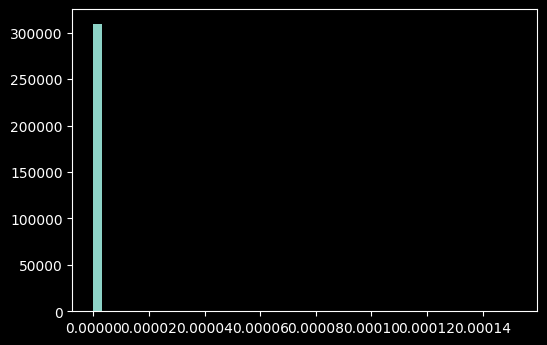

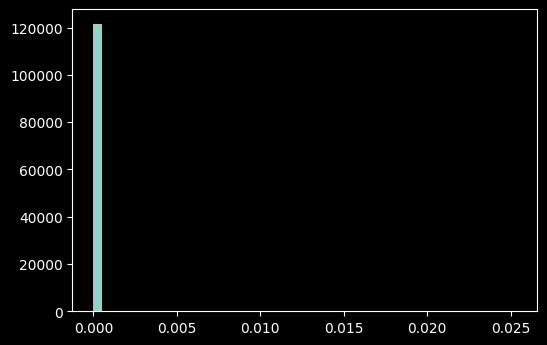

Feature: is_convex


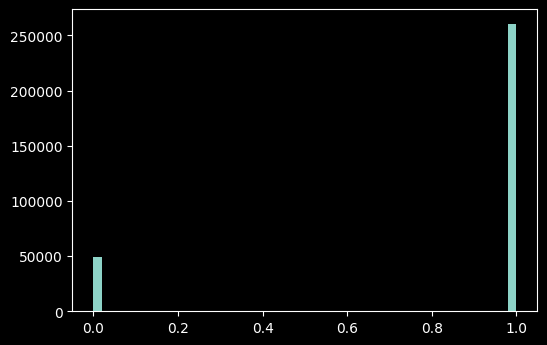

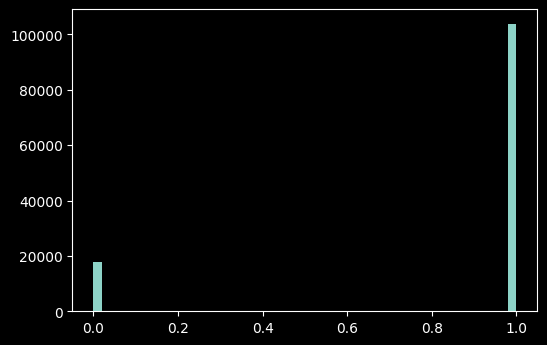

Feature: centroid_dist


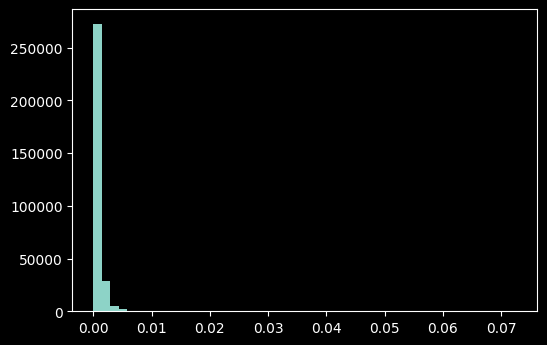

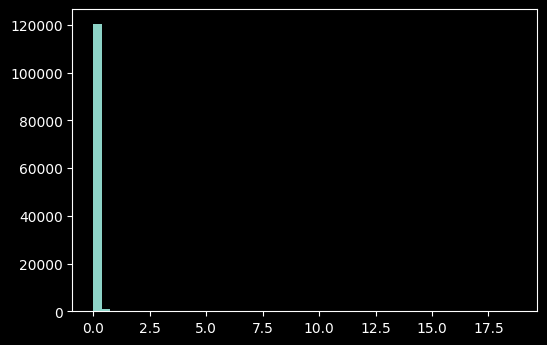

Feature: length/width


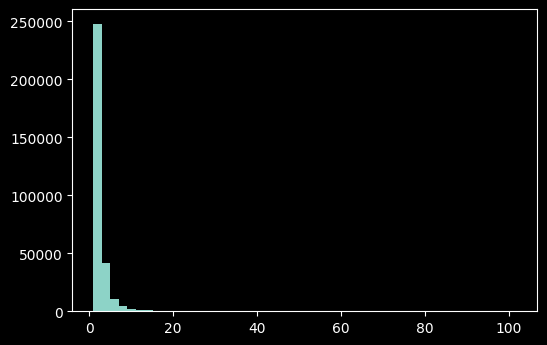

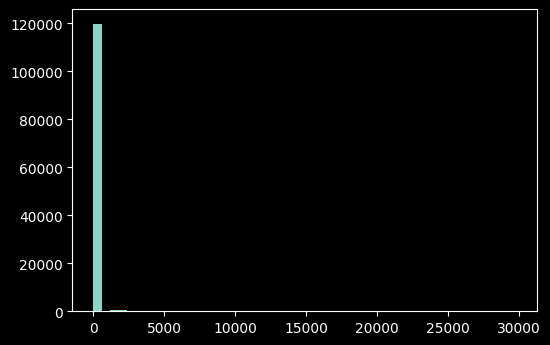

Feature: Dense Urban


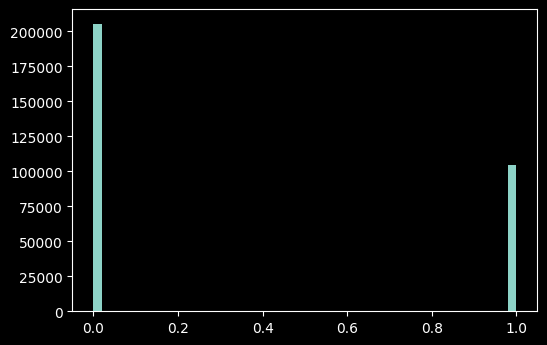

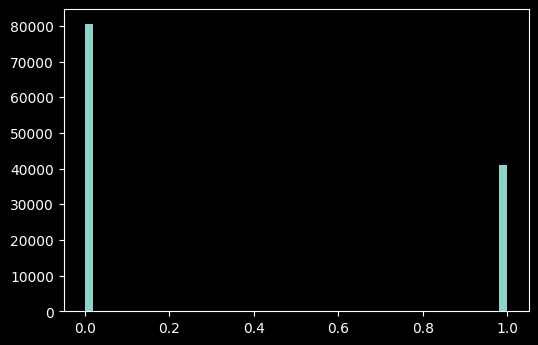

Feature: Industrial


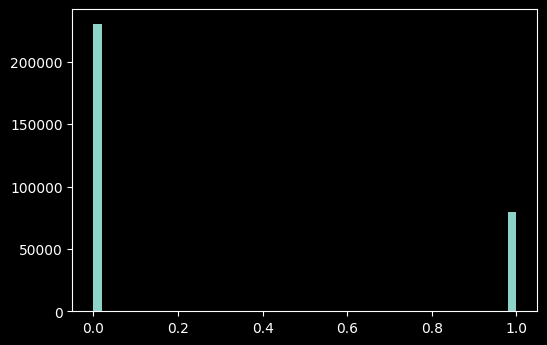

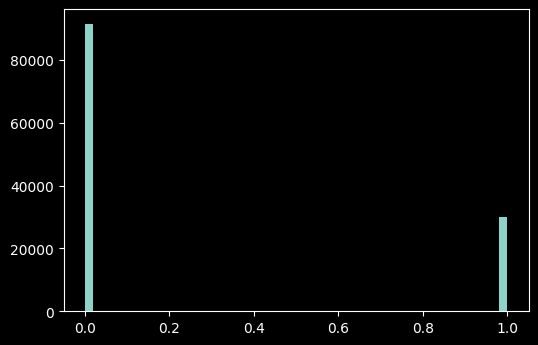

Feature: None


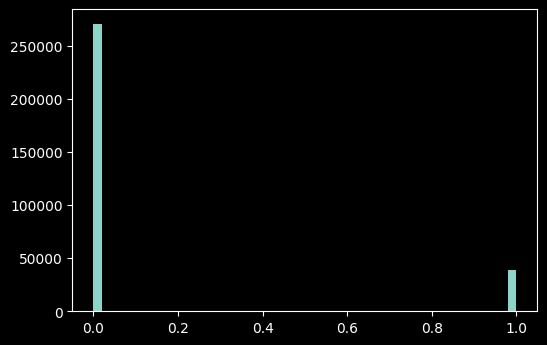

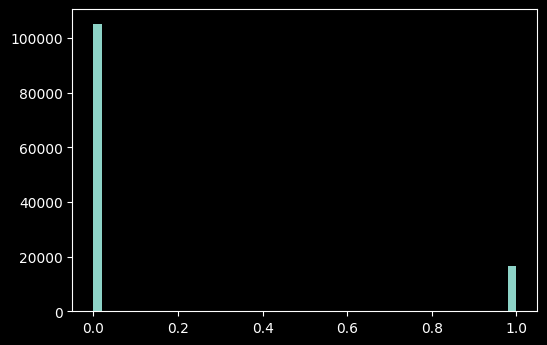

Feature: Rural


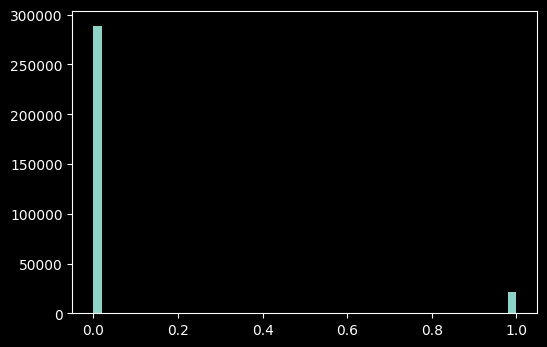

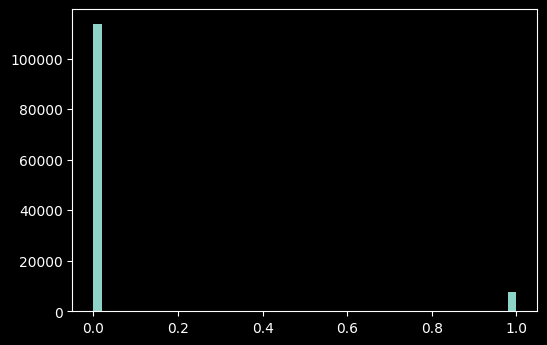

Feature: Sparse Urban


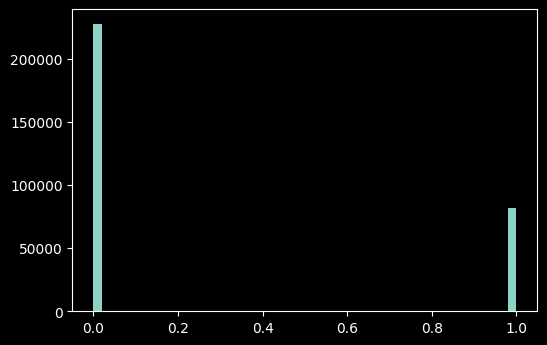

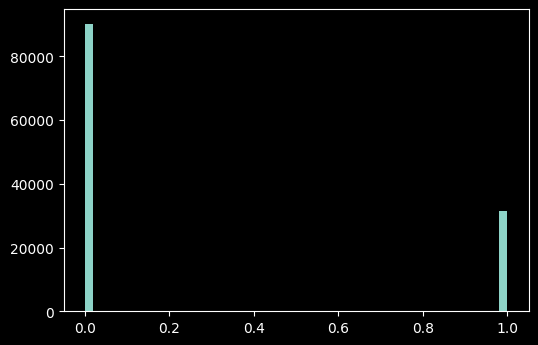

Feature: Urban Slum


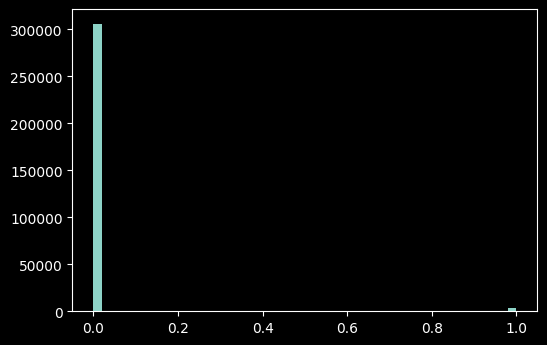

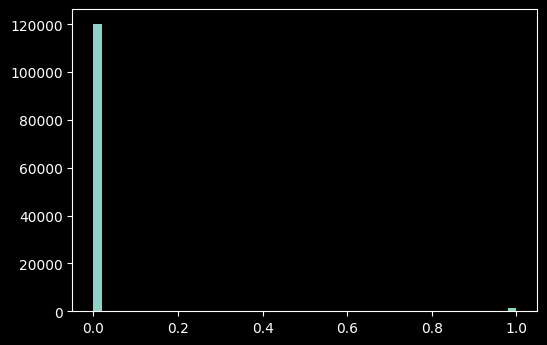

Feature: Barren Land


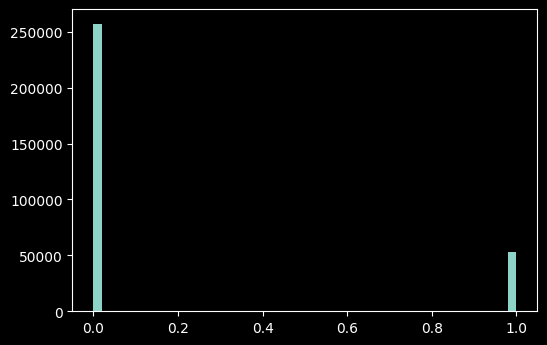

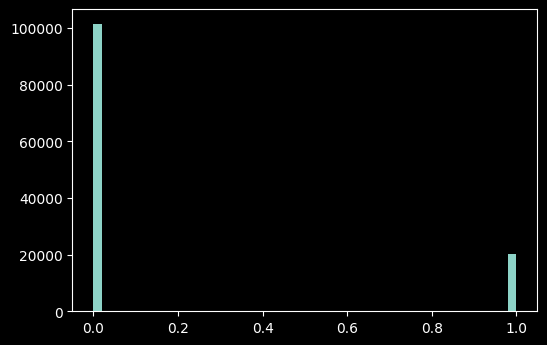

Feature: Coastal


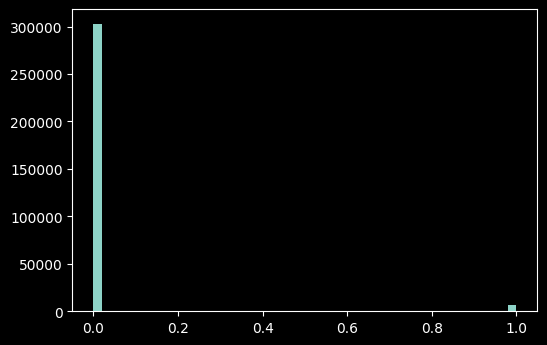

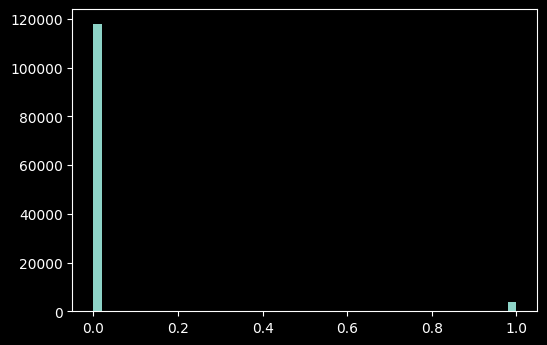

Feature: Dense Forest


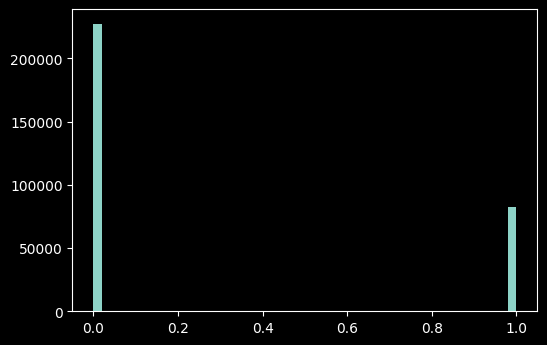

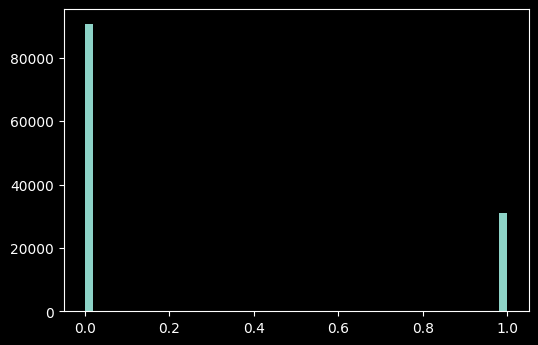

Feature: Desert


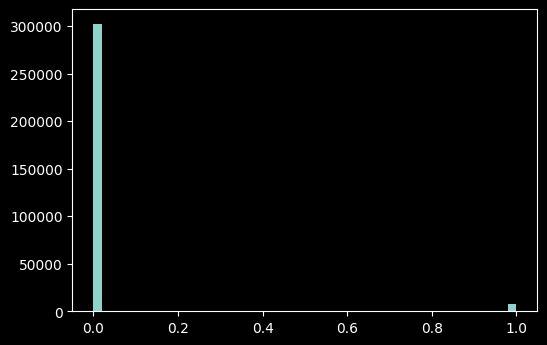

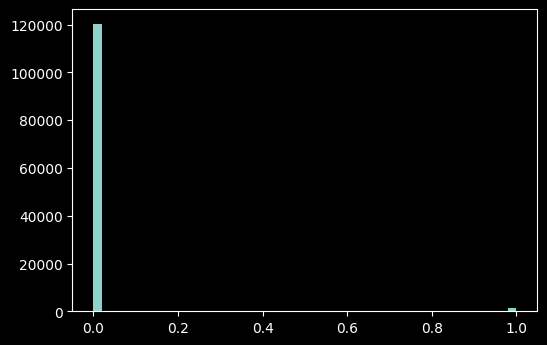

Feature: Farms


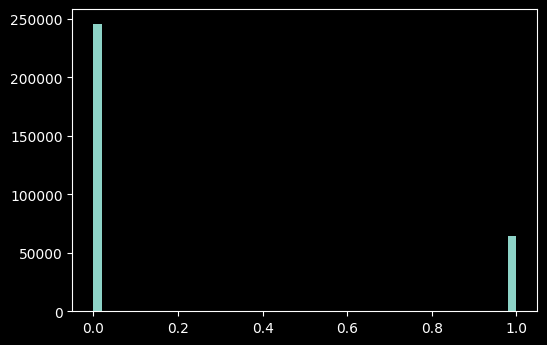

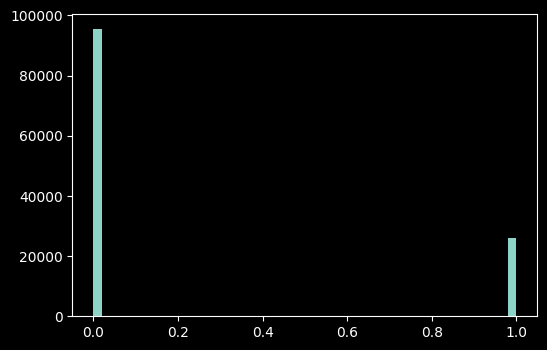

Feature: Grass Land


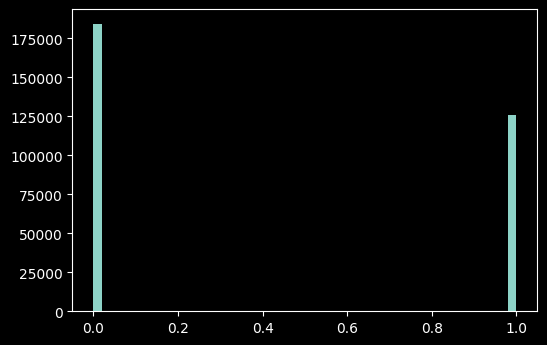

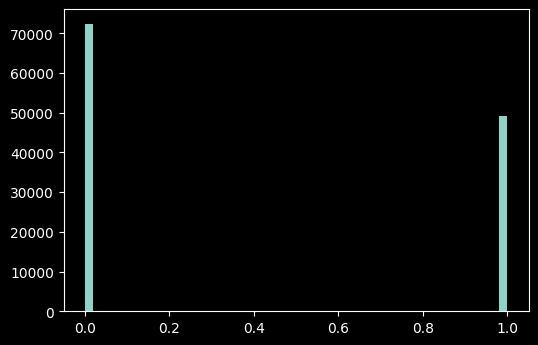

Feature: Hills


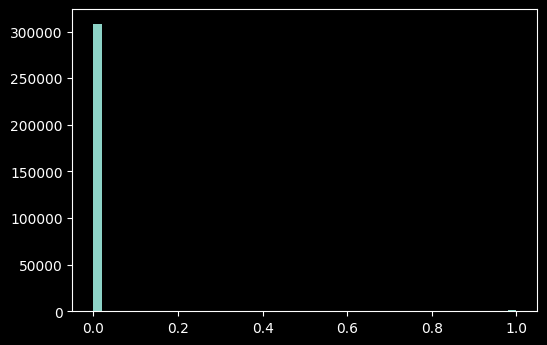

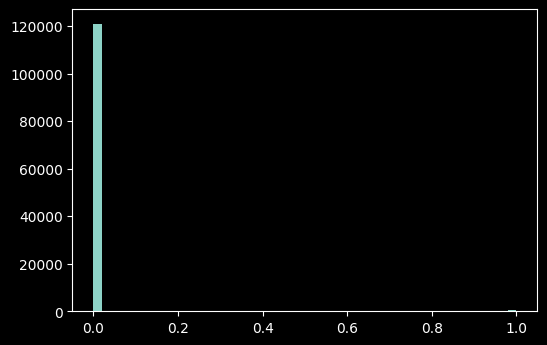

Feature: Lakes


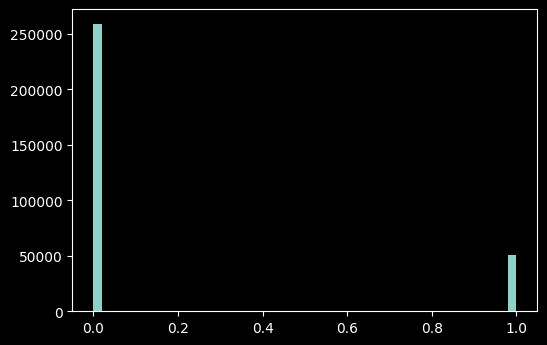

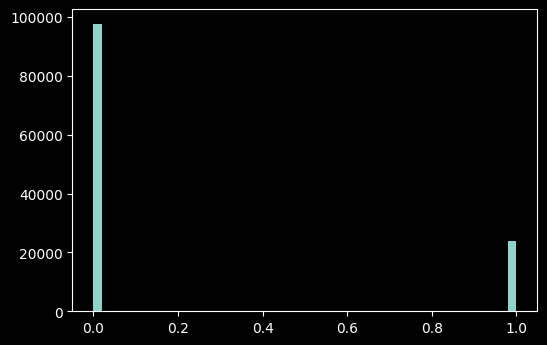

Feature: None.1


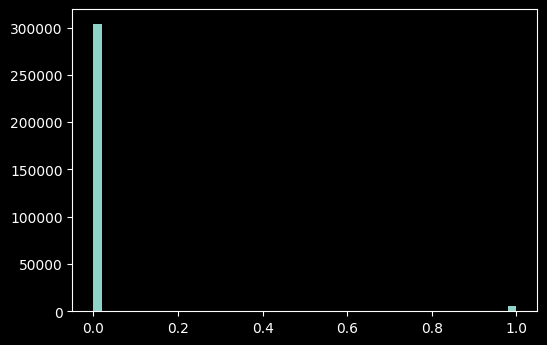

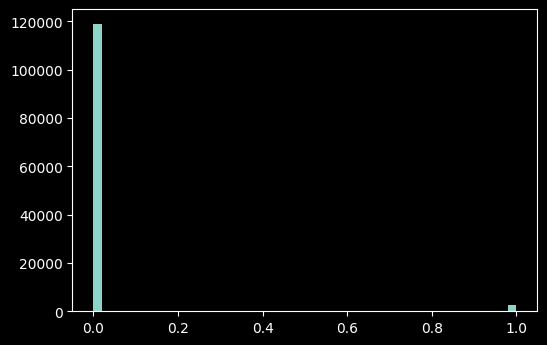

Feature: River


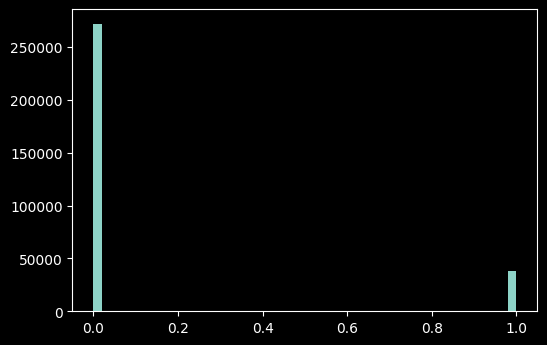

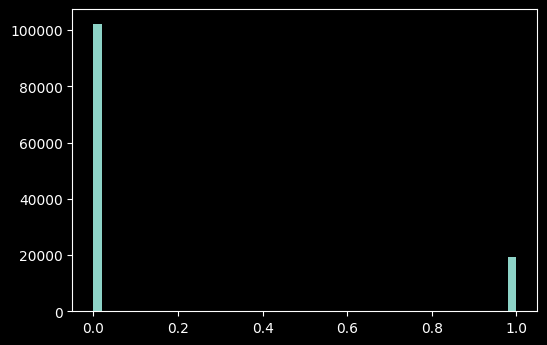

Feature: Snow


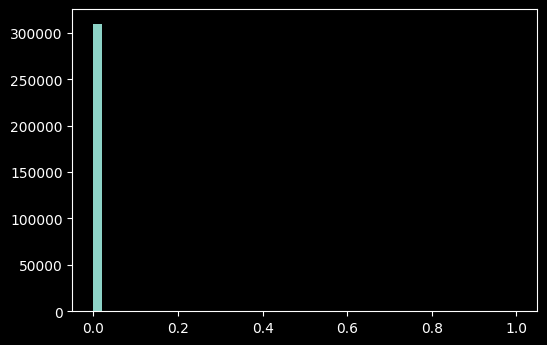

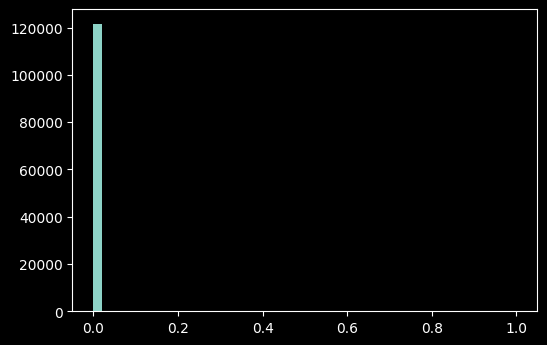

Feature: Sparse Forest


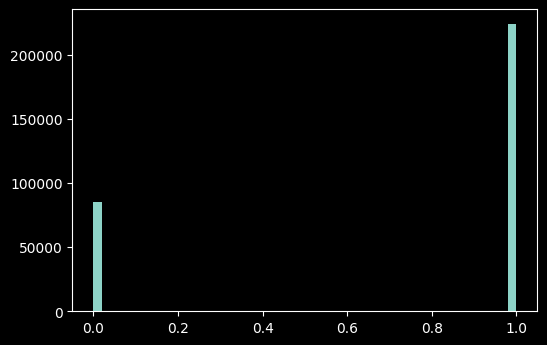

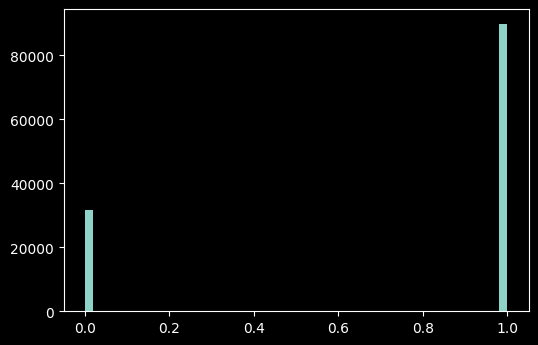

Feature: knn_mean_area


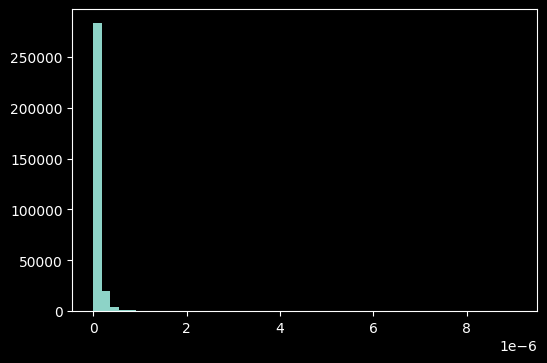

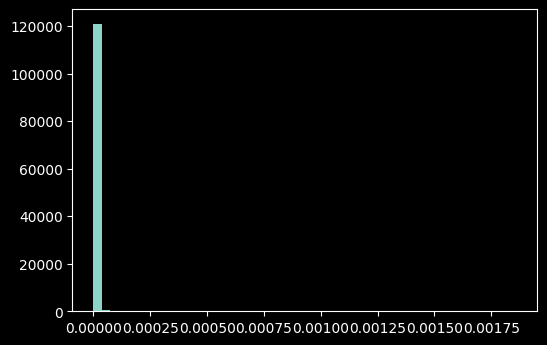

Feature: knn_mean_length


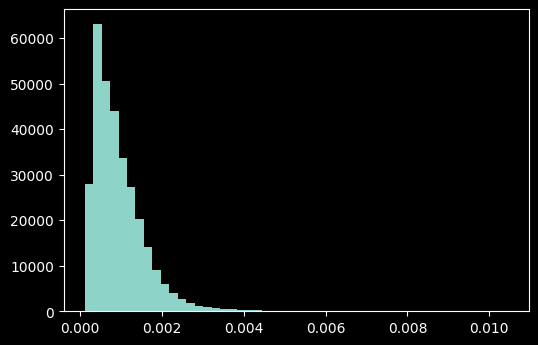

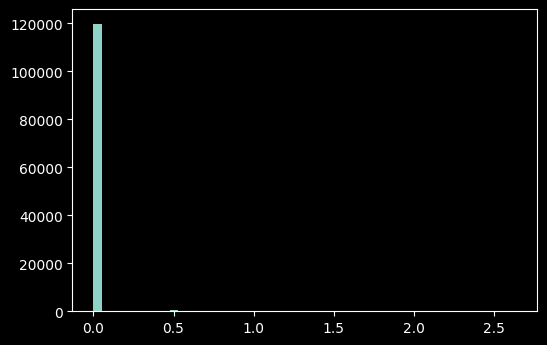

Feature: knn_mean_area/length**2


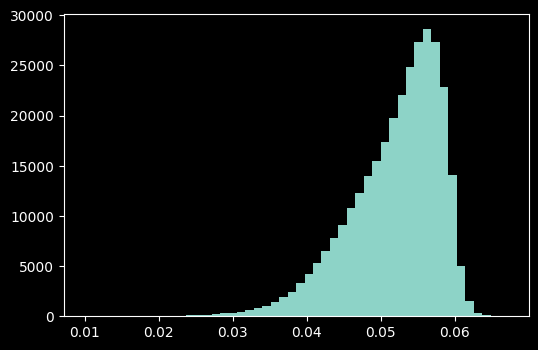

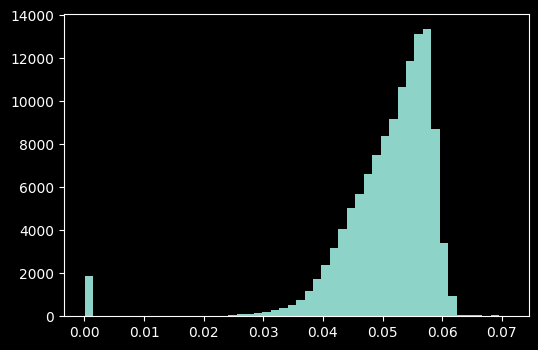

Feature: knn_mean_elongation


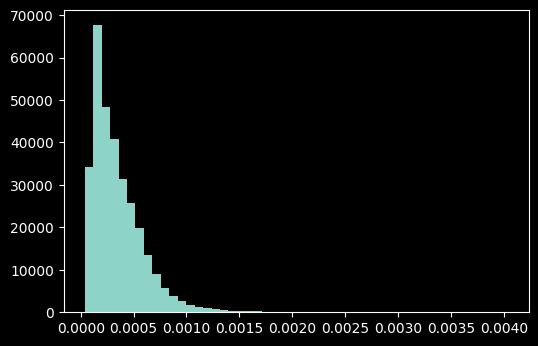

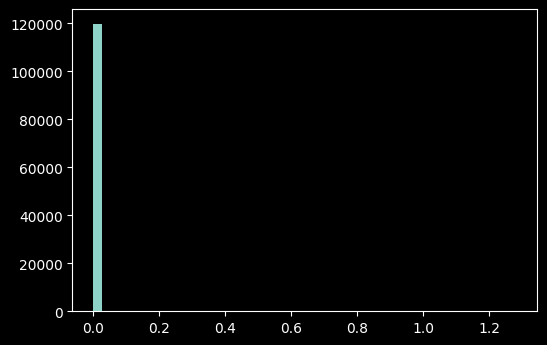

Feature: knn_mean_centroid_x


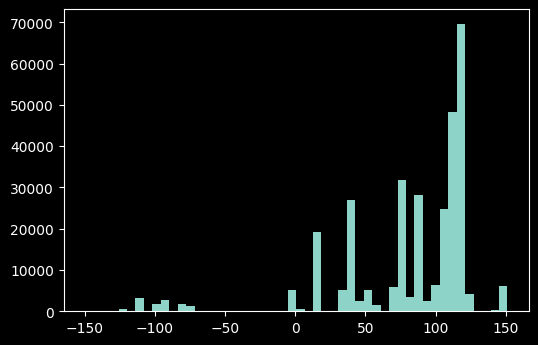

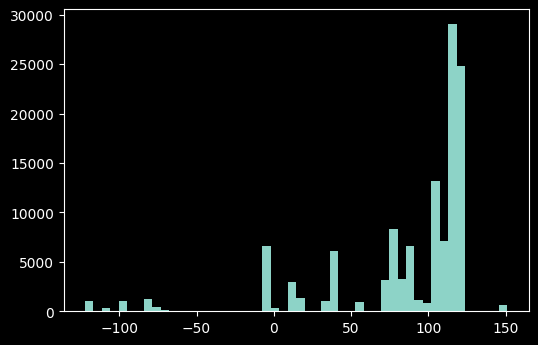

Feature: knn_mean_height


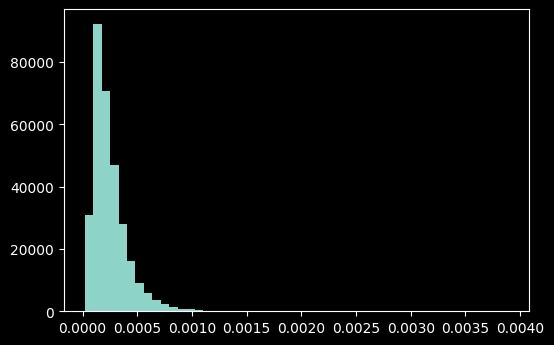

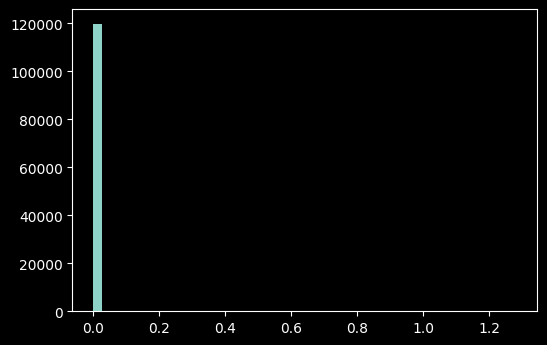

Feature: knn_mean_width


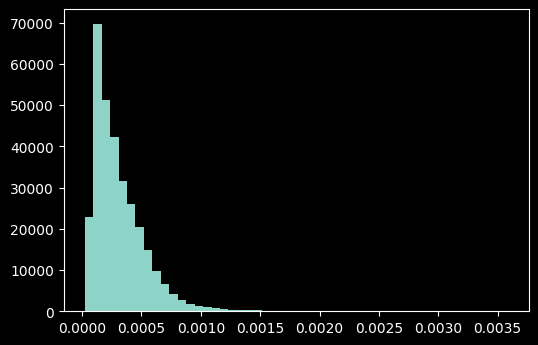

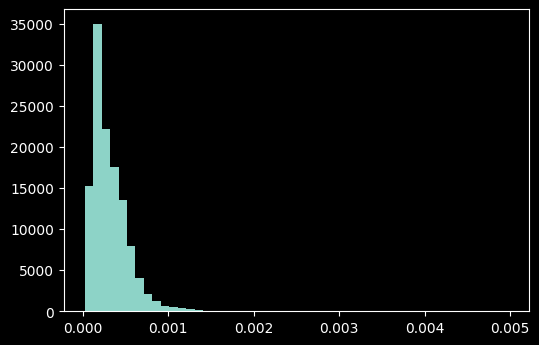

Feature: knn_mean_nb_points


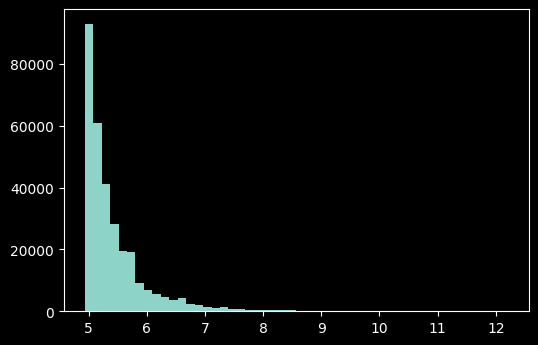

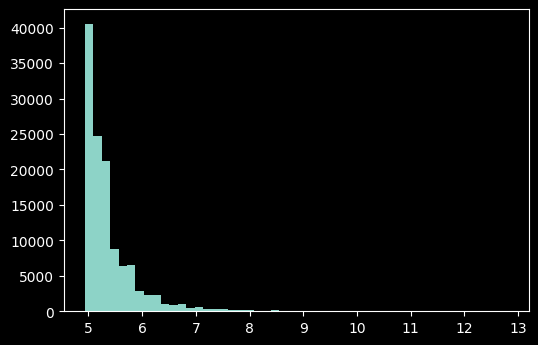

Feature: knn_mean_centroid_dist


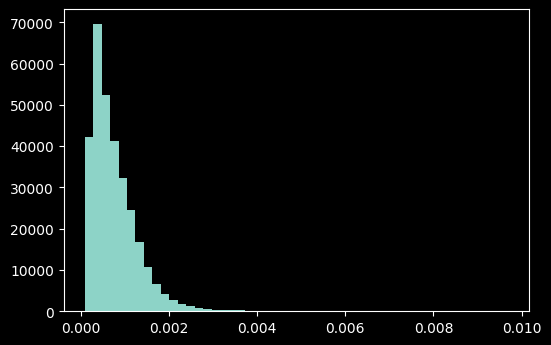

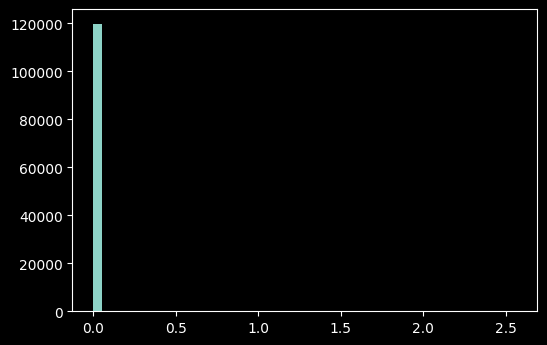

Feature: knn_mean_length/width


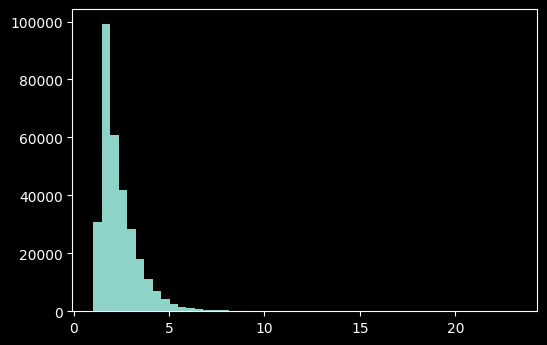

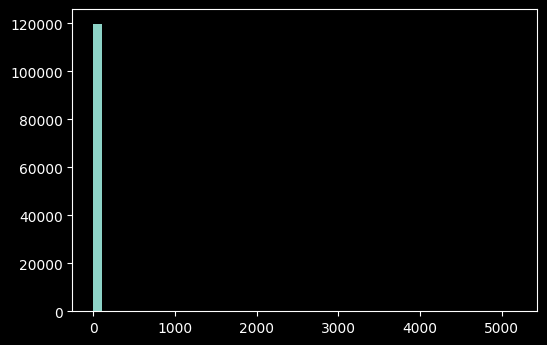

Feature: knn_mean_Dense Urban


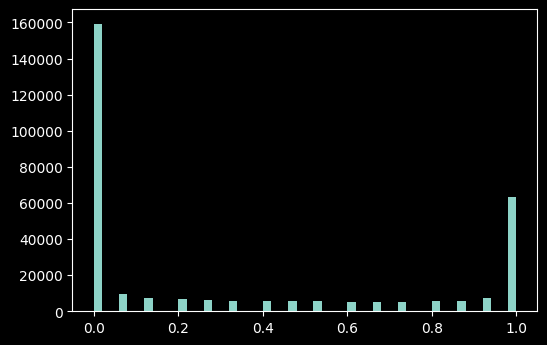

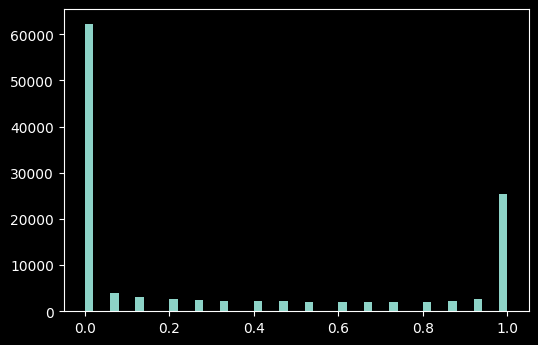

Feature: knn_mean_Industrial


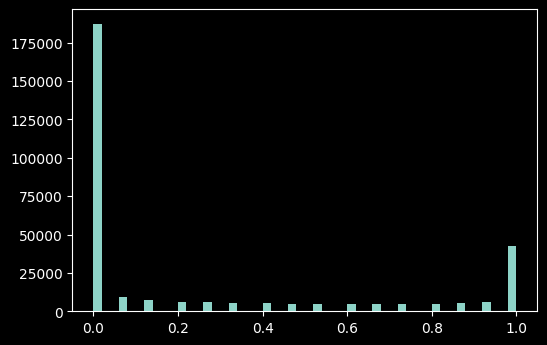

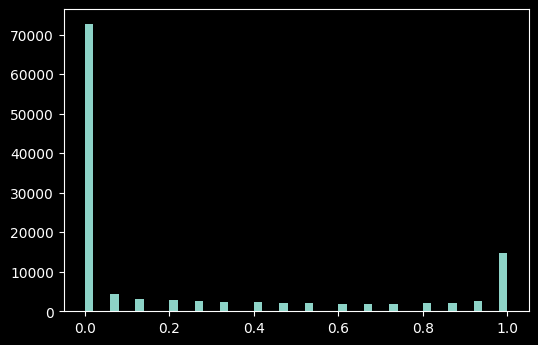

Feature: knn_mean_None


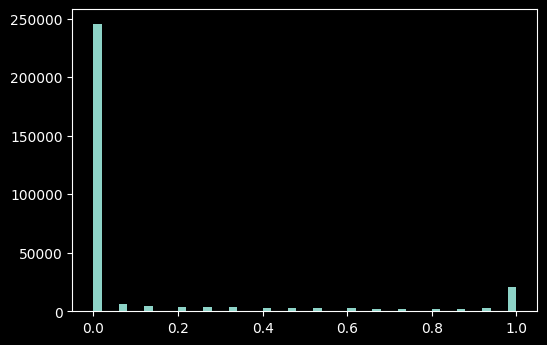

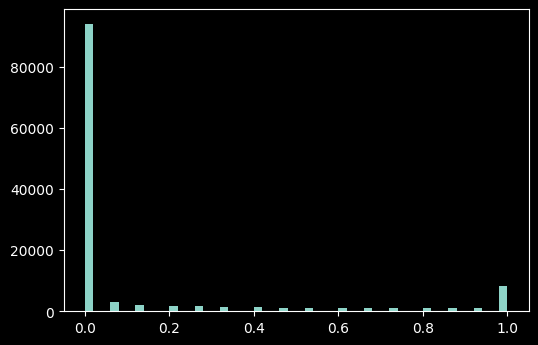

Feature: knn_mean_Rural


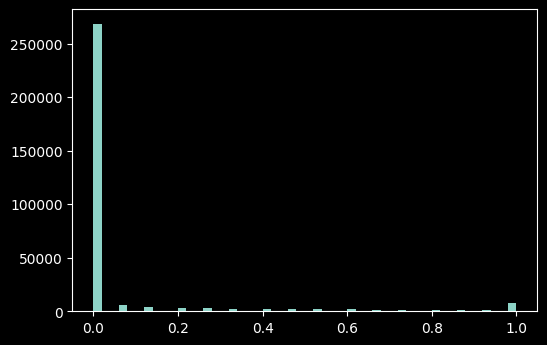

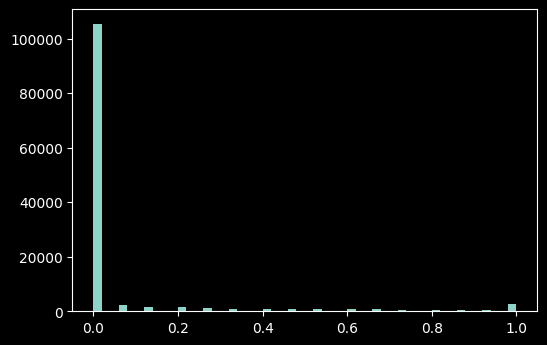

Feature: knn_mean_Sparse Urban


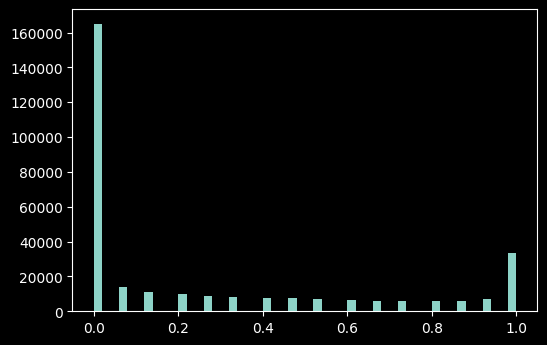

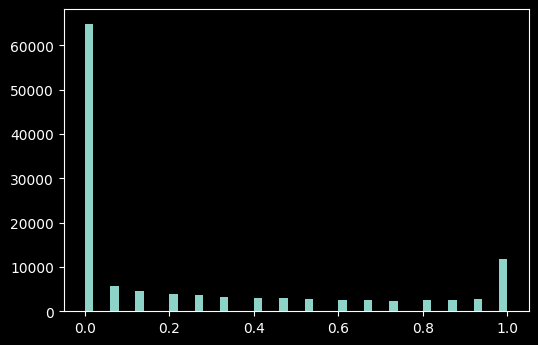

Feature: knn_mean_Urban Slum


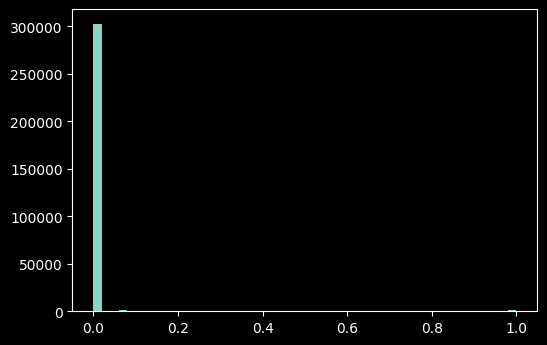

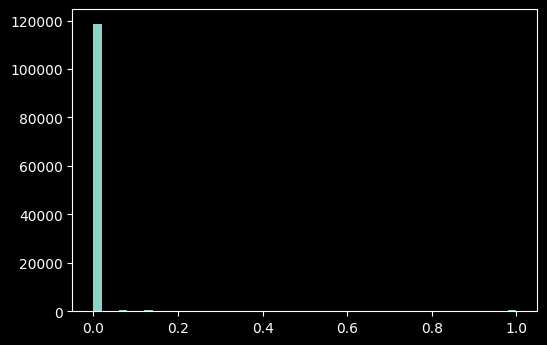

Feature: knn_mean_Barren Land


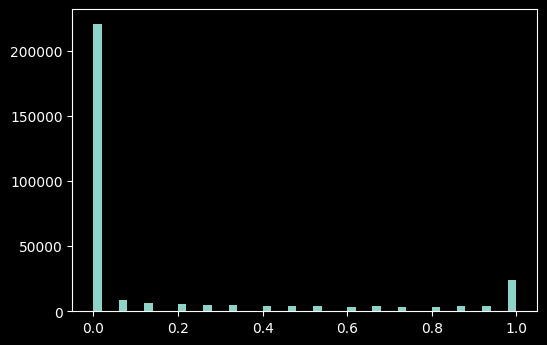

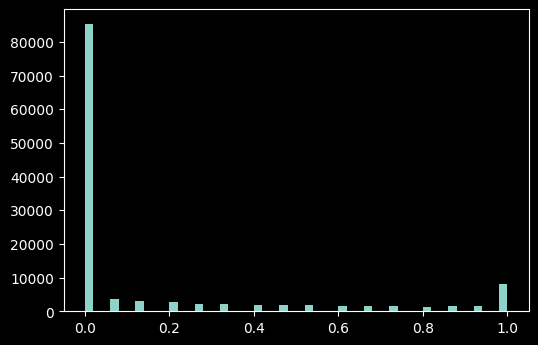

Feature: knn_mean_Coastal


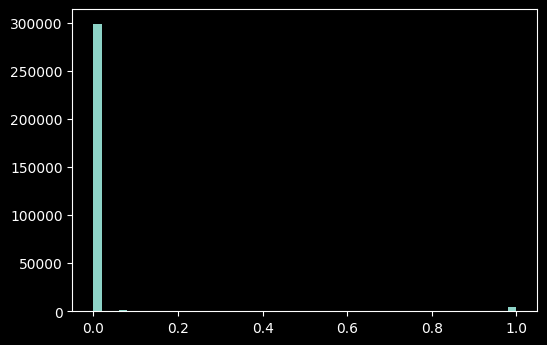

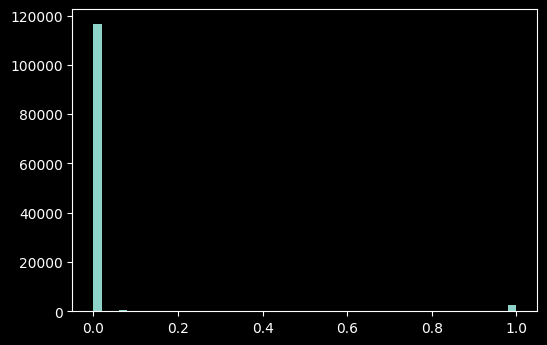

Feature: knn_mean_Dense Forest


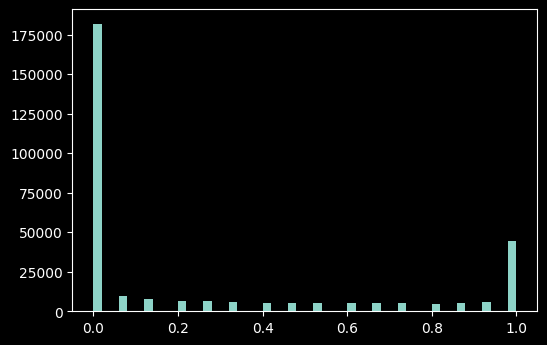

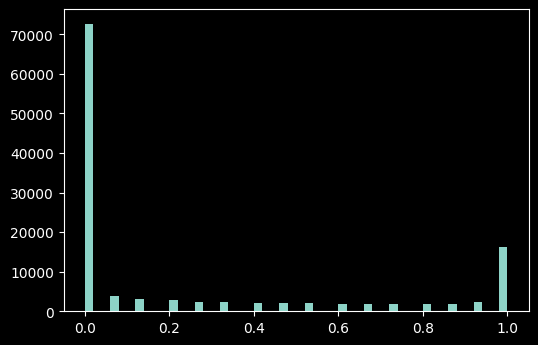

Feature: knn_mean_Desert


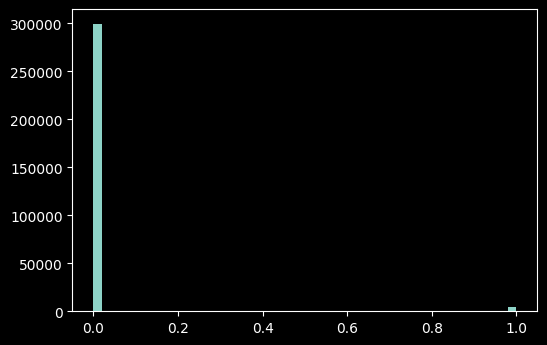

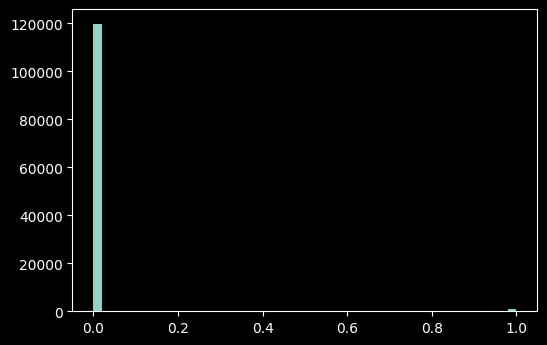

Feature: knn_mean_Farms


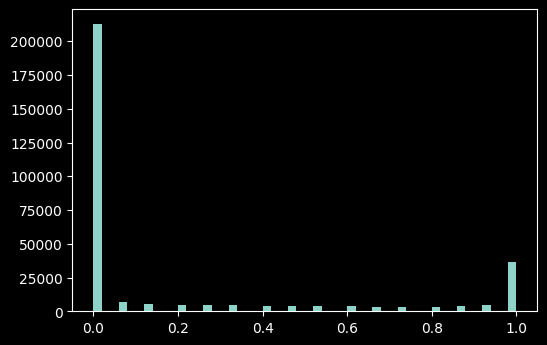

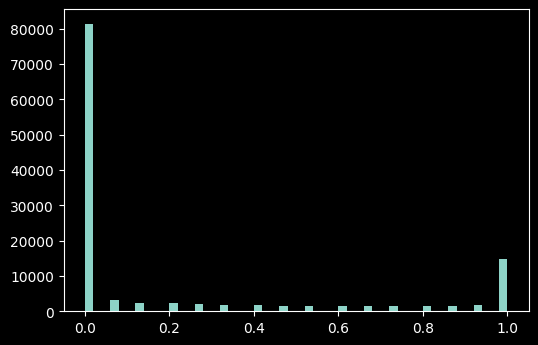

Feature: knn_mean_Grass Land


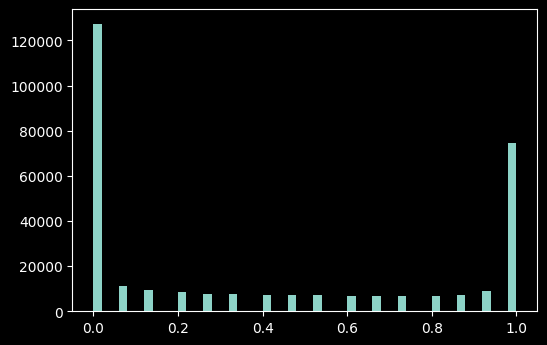

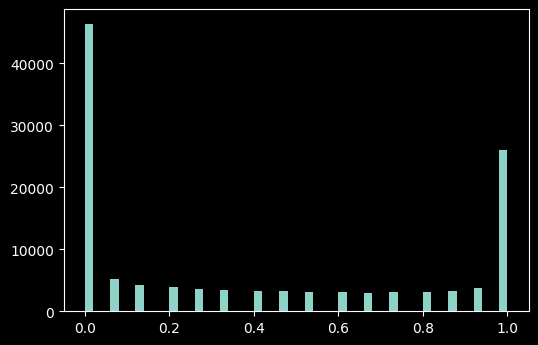

Feature: knn_mean_Hills


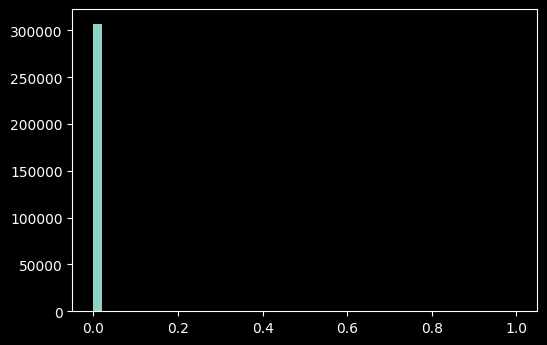

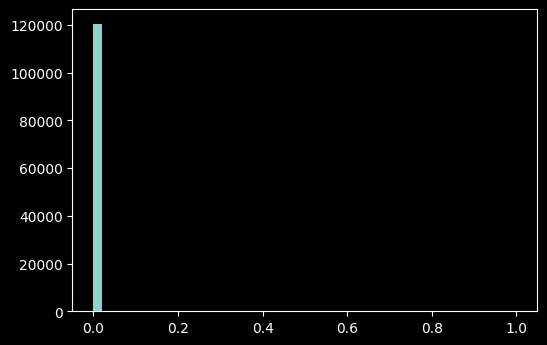

Feature: knn_mean_Lakes


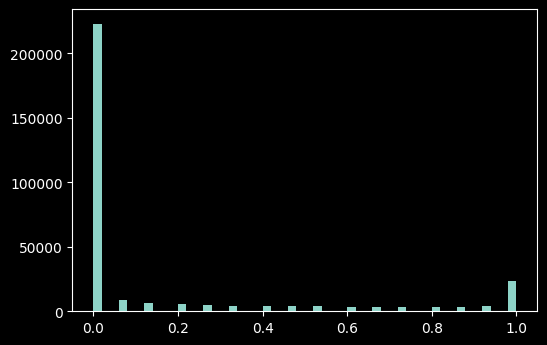

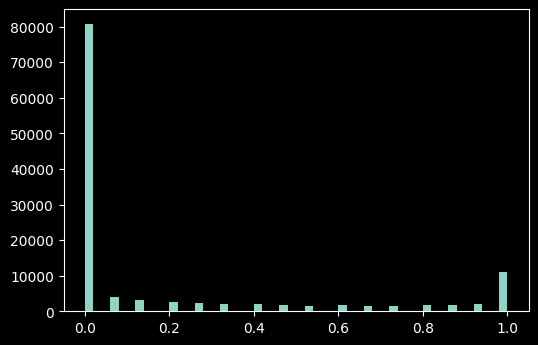

Feature: knn_mean_None.1


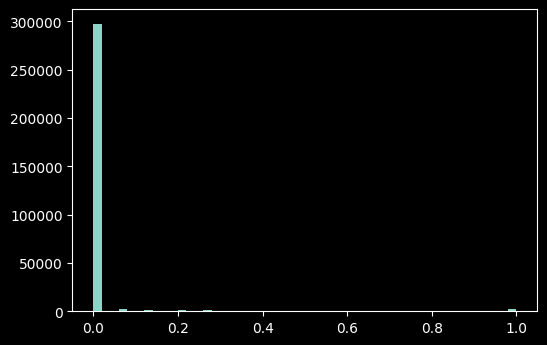

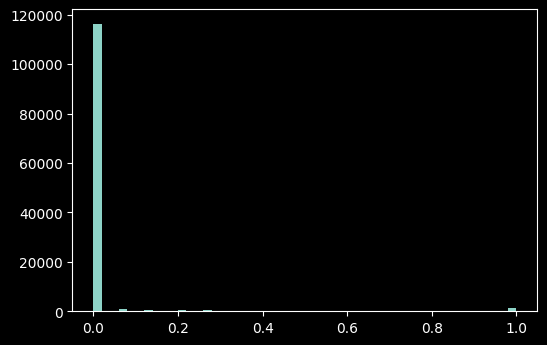

Feature: knn_mean_River


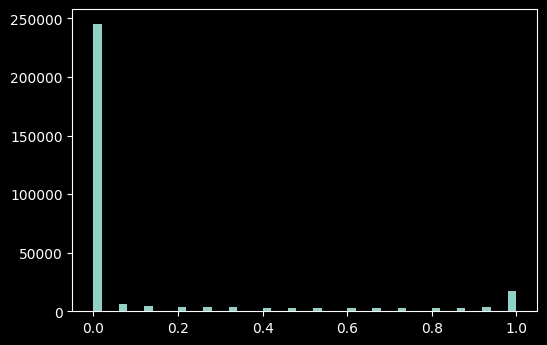

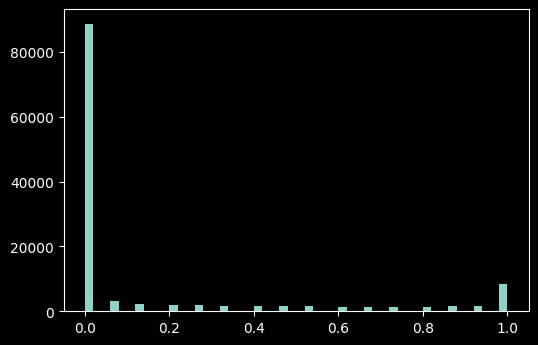

Feature: knn_mean_Snow


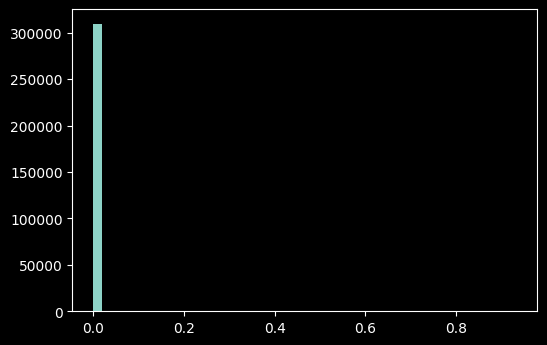

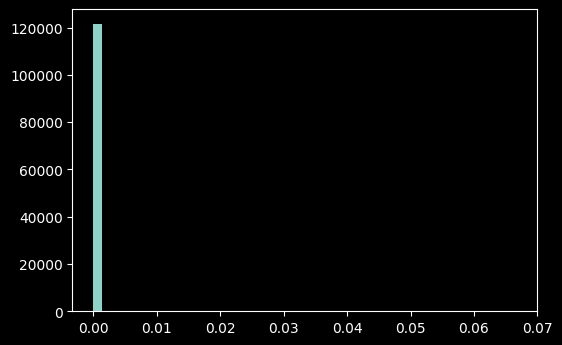

Feature: knn_mean_Sparse Forest


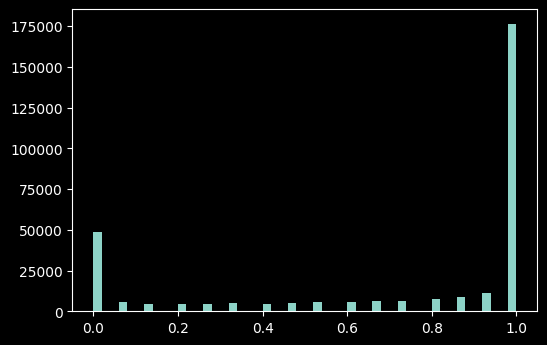

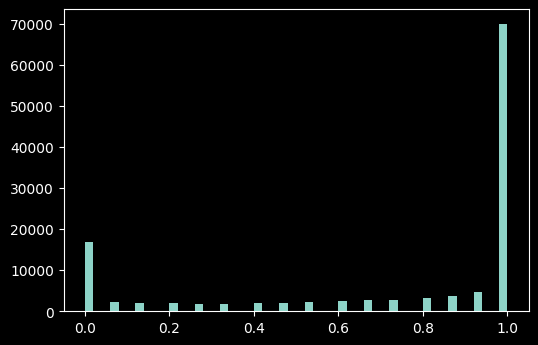

Feature: knn_mean_diff1


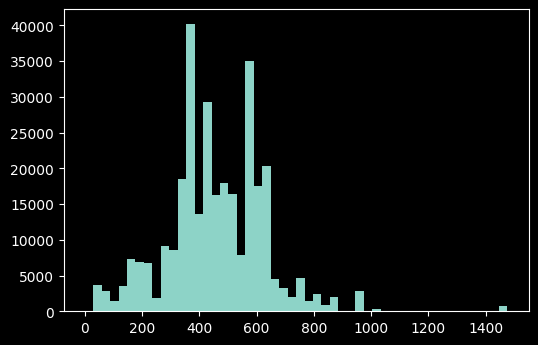

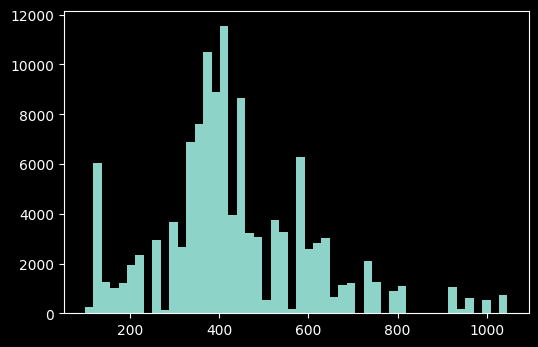

Feature: knn_mean_diff2


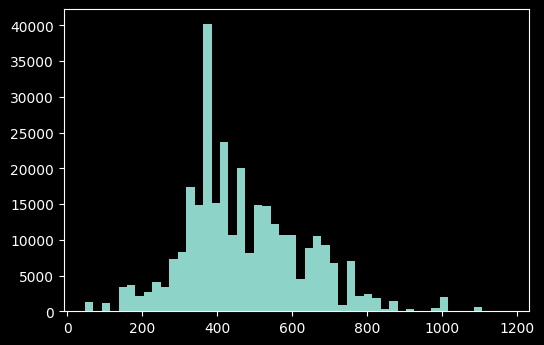

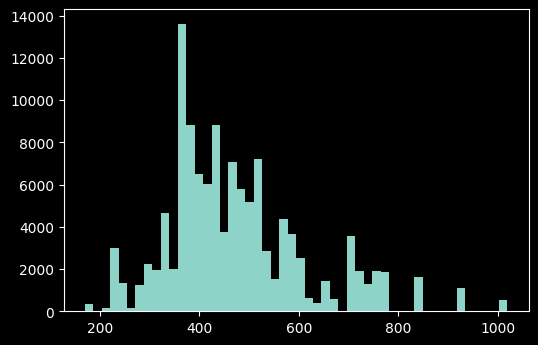

Feature: knn_mean_diff3


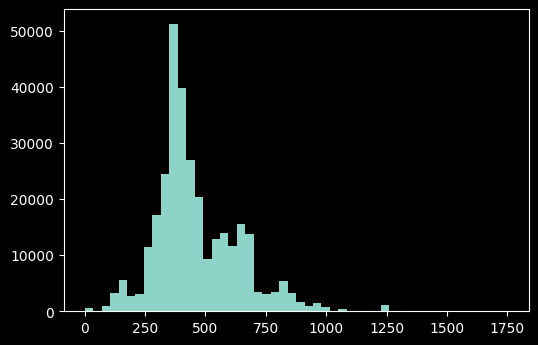

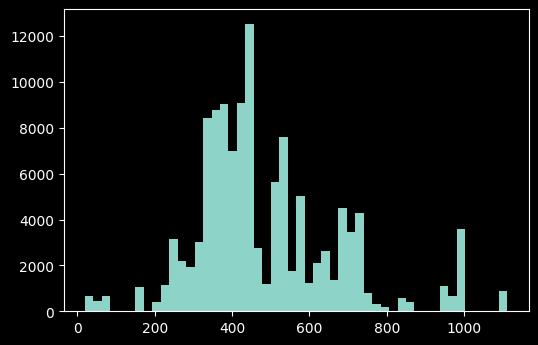

Feature: knn_mean_diff4


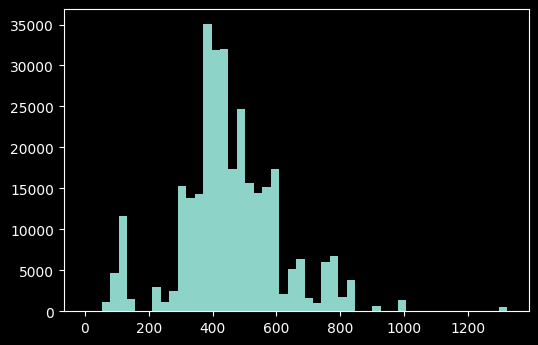

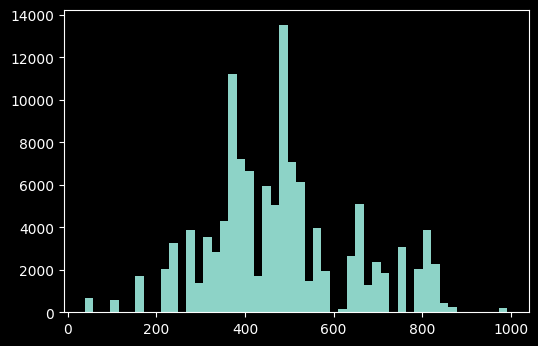

Feature: knn_mean_year_date1


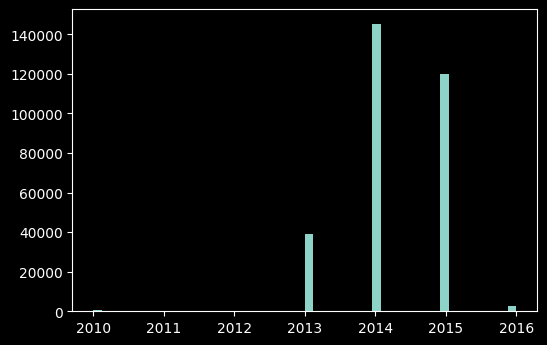

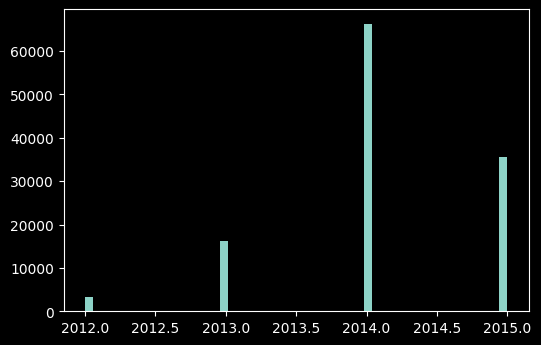

Feature: knn_mean_year_date2


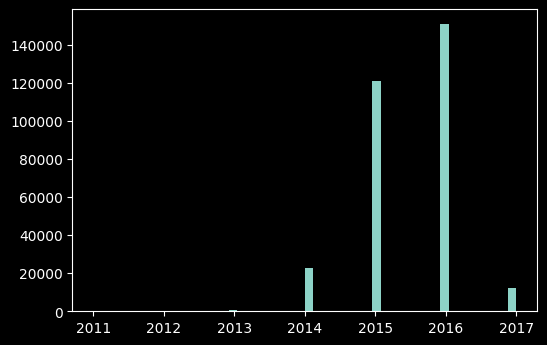

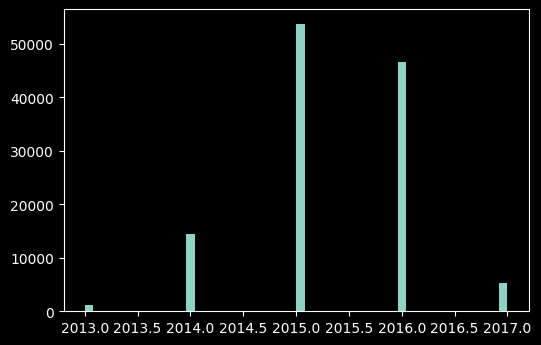

Feature: knn_mean_year_date3


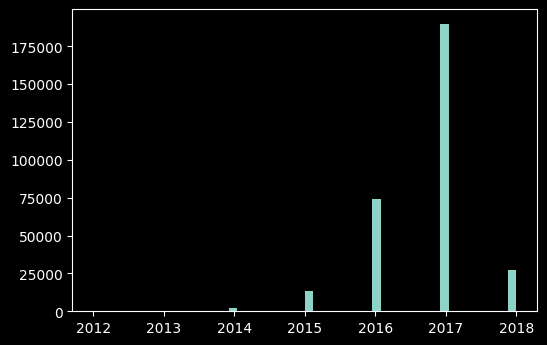

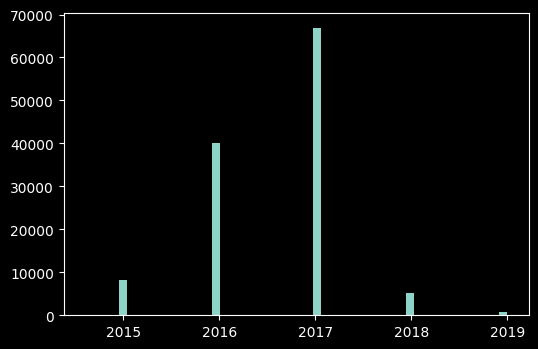

Feature: knn_mean_year_date4


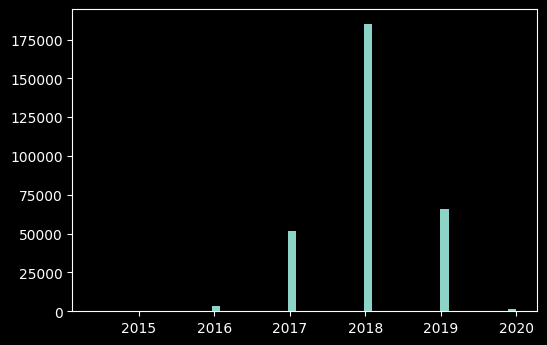

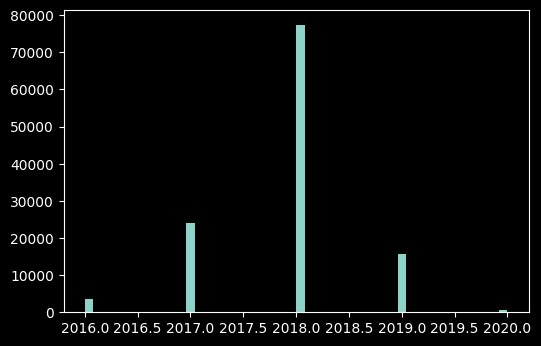

Feature: knn_mean_year_date5


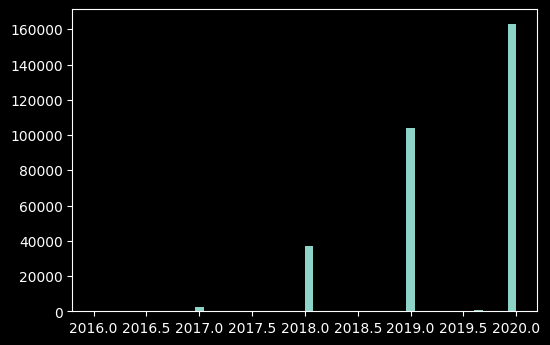

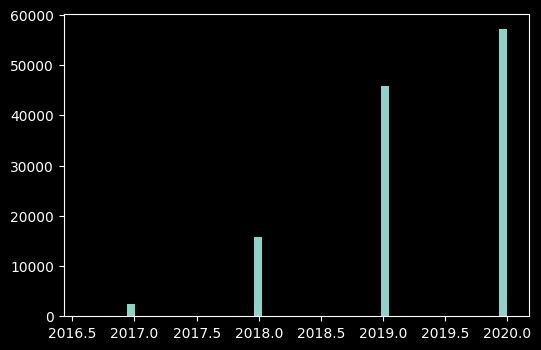

Feature: 1th_nn_area


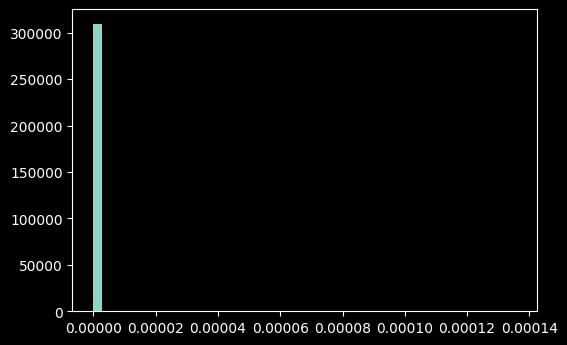

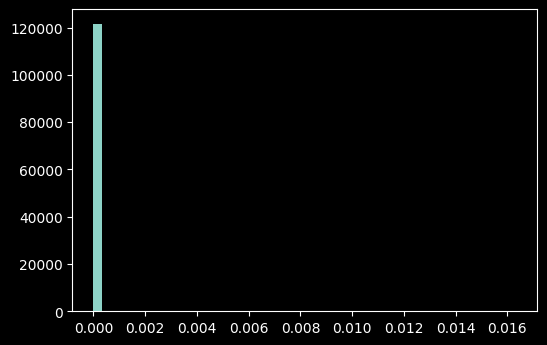

Feature: 1th_nn_length


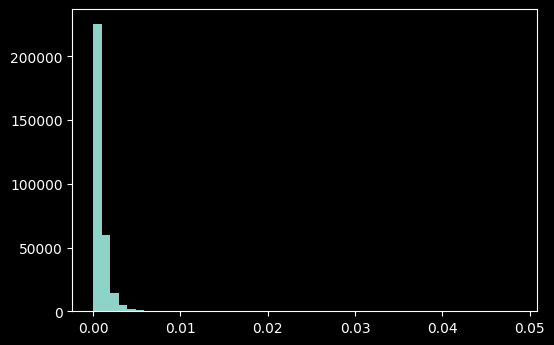

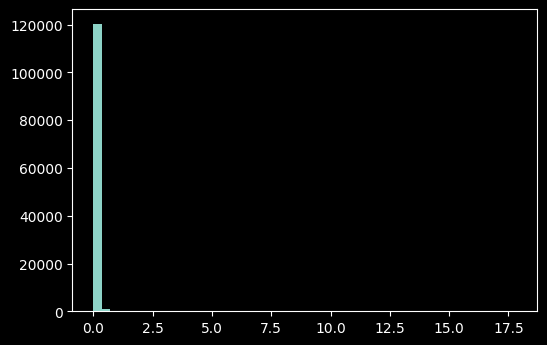

Feature: 1th_nn_area/length**2


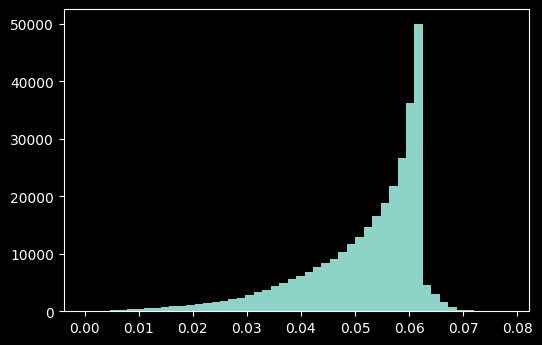

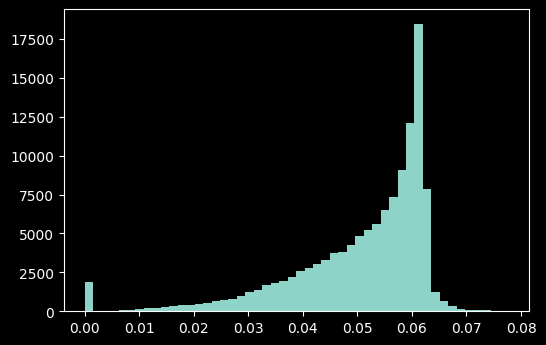

Feature: 1th_nn_elongation


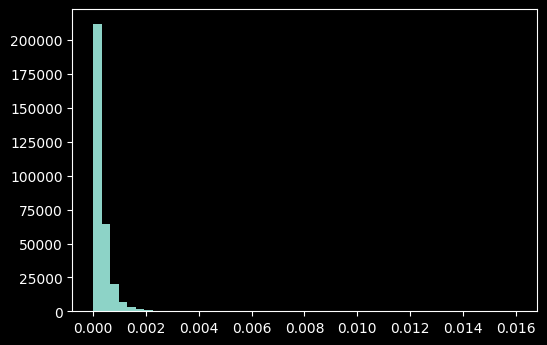

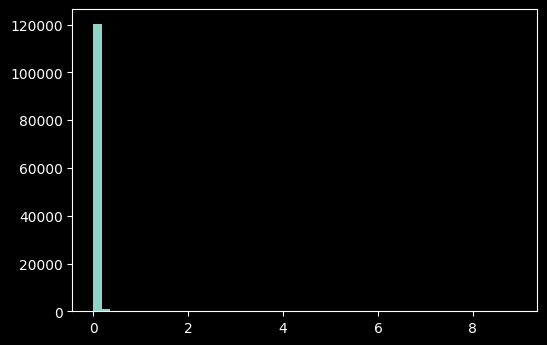

Feature: 1th_nn_centroid_x


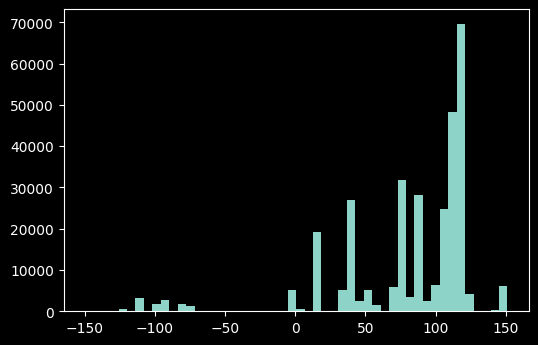

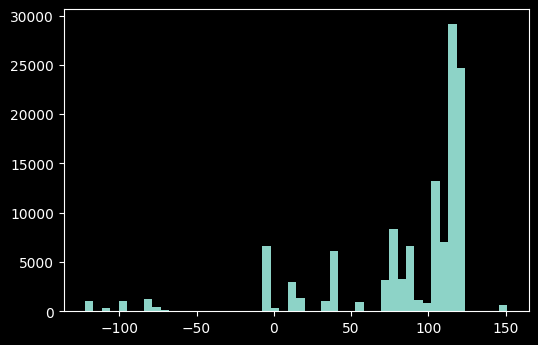

Feature: 1th_nn_height


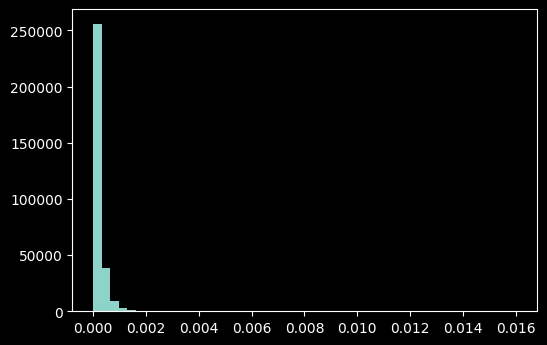

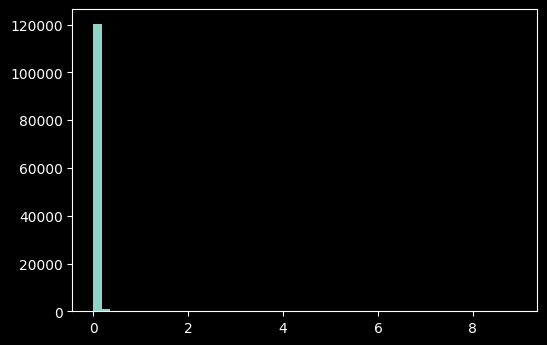

Feature: 1th_nn_width


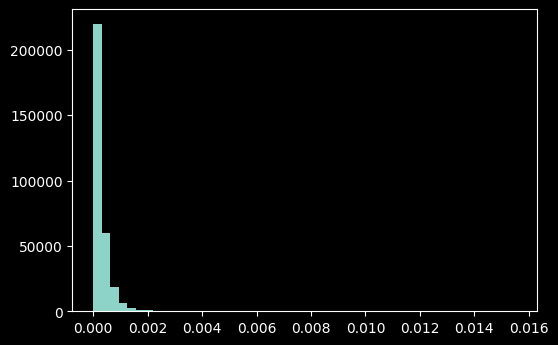

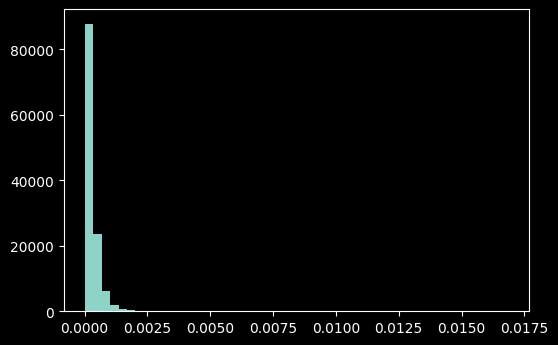

Feature: 1th_nn_nb_points


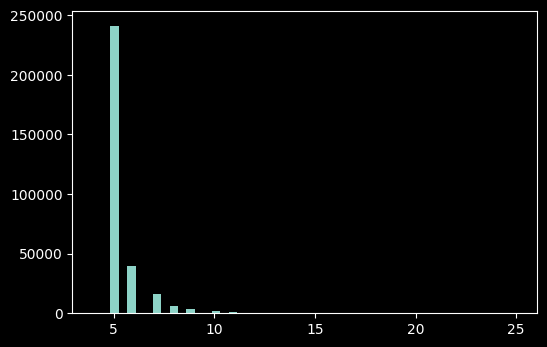

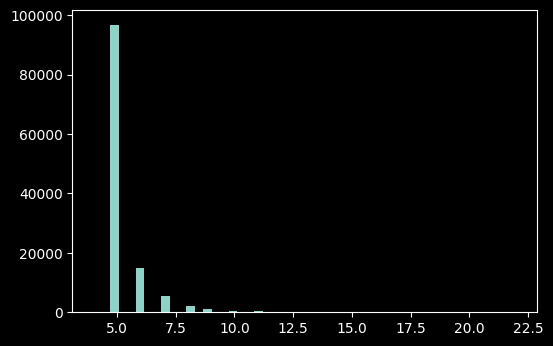

Feature: 1th_nn_centroid_dist


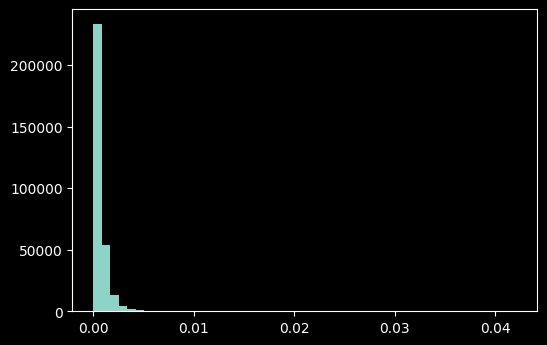

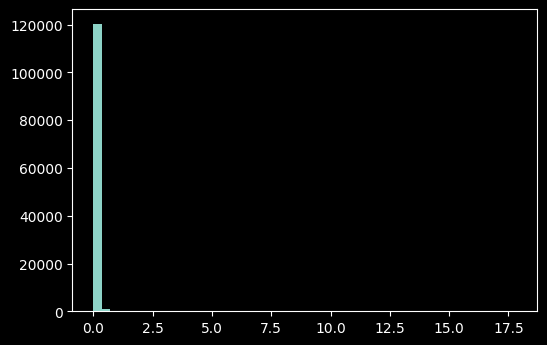

Feature: 1th_nn_length/width


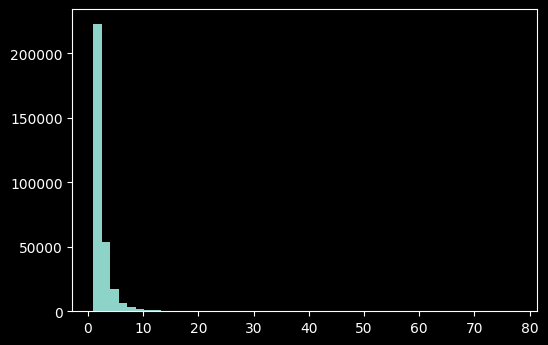

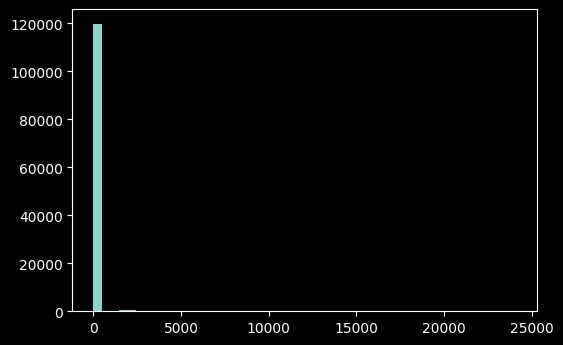

Feature: 1th_nn_Dense Urban


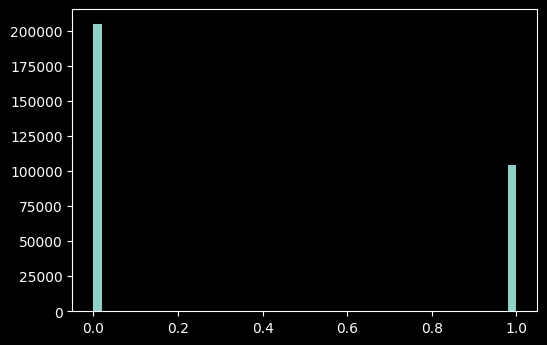

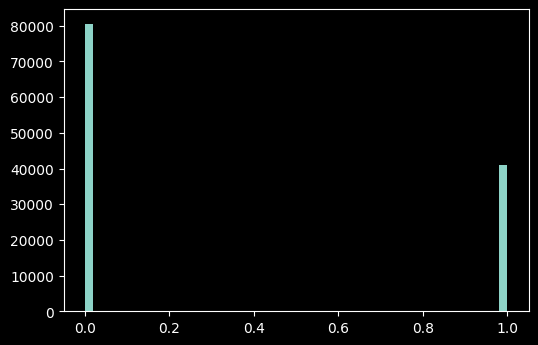

Feature: 1th_nn_Industrial


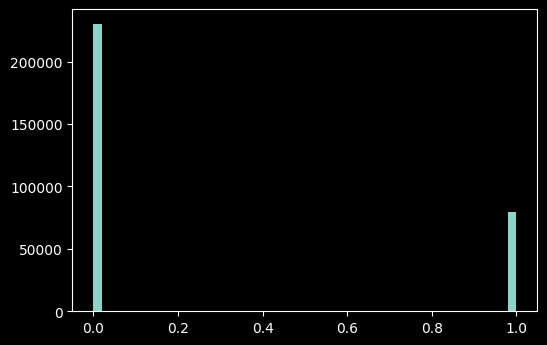

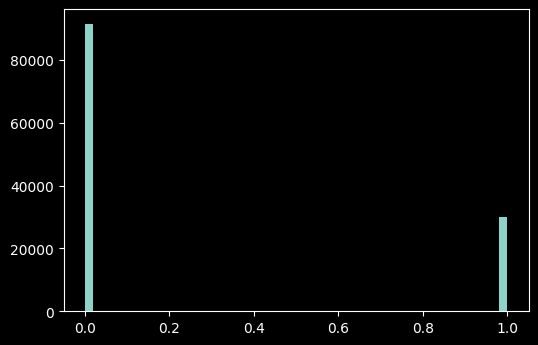

Feature: 1th_nn_None


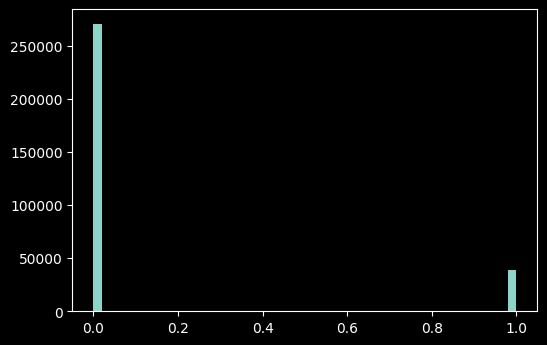

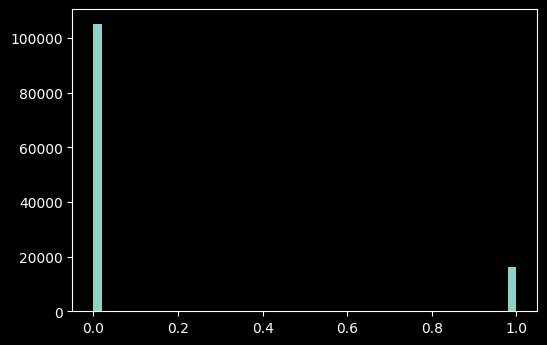

Feature: 1th_nn_Rural


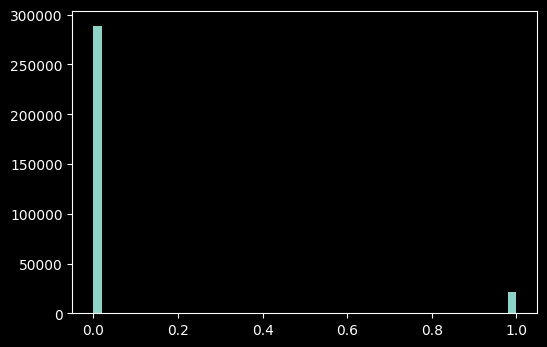

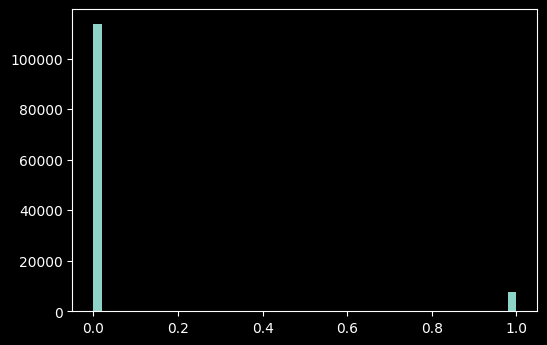

Feature: 1th_nn_Sparse Urban


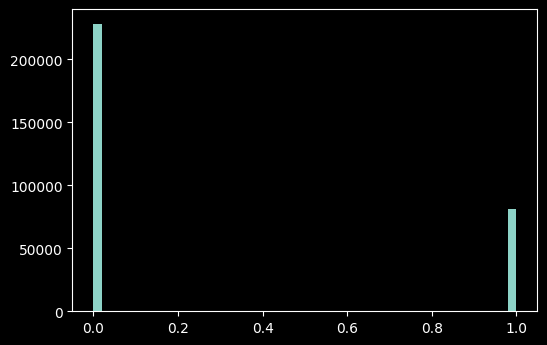

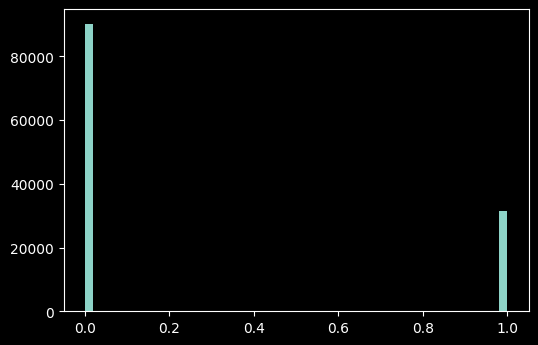

Feature: 1th_nn_Urban Slum


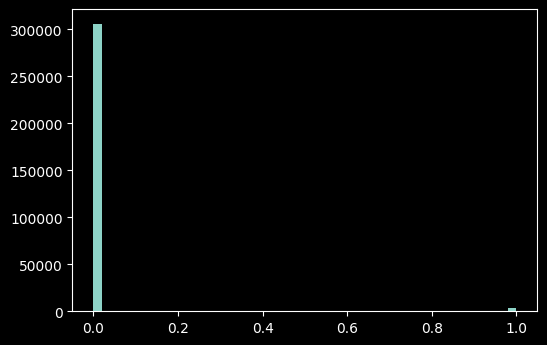

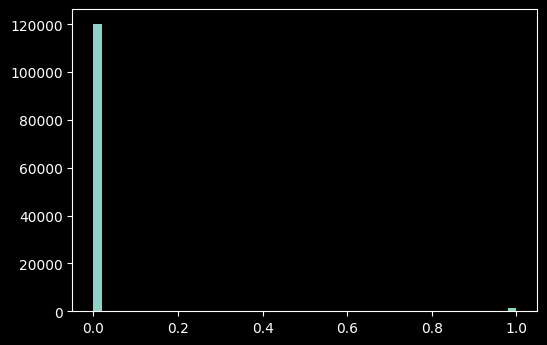

Feature: 1th_nn_Barren Land


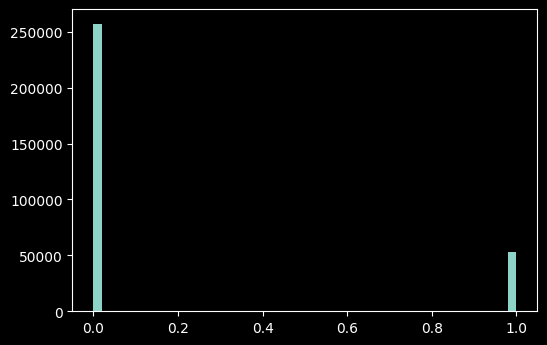

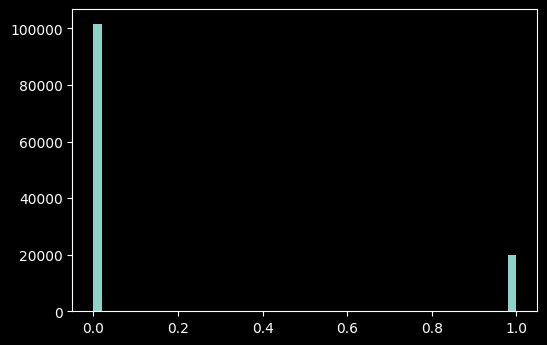

Feature: 1th_nn_Coastal


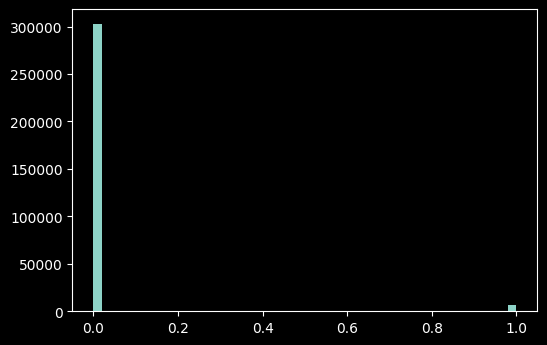

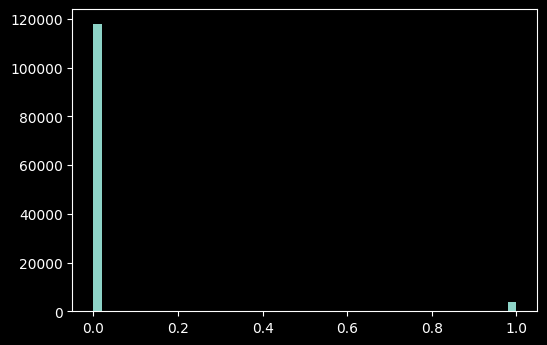

Feature: 1th_nn_Dense Forest


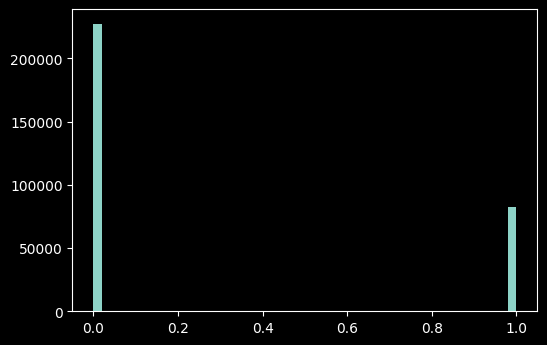

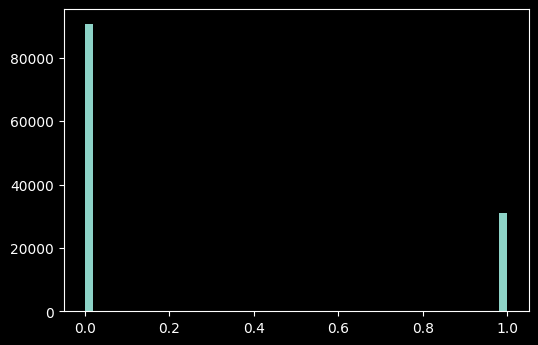

Feature: 1th_nn_Desert


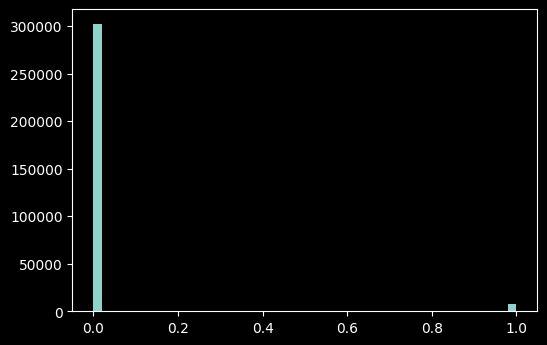

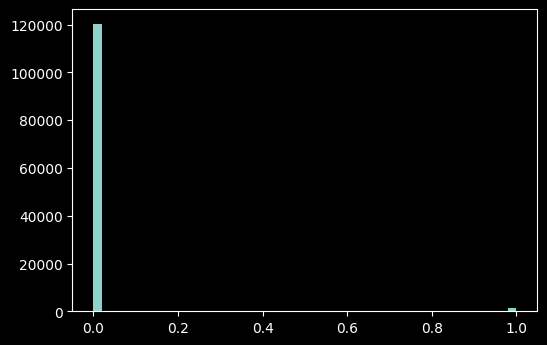

Feature: 1th_nn_Farms


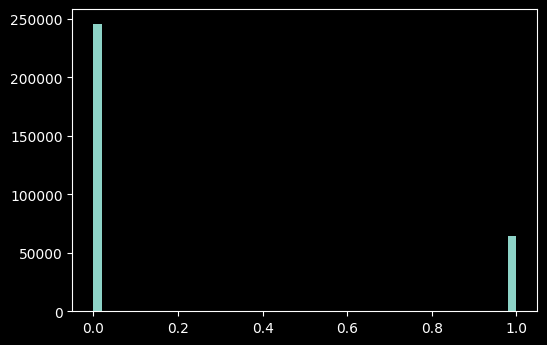

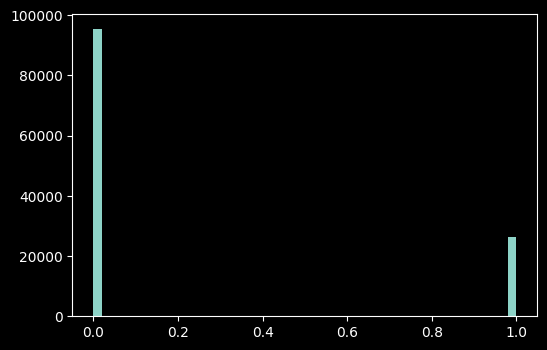

Feature: 1th_nn_Grass Land


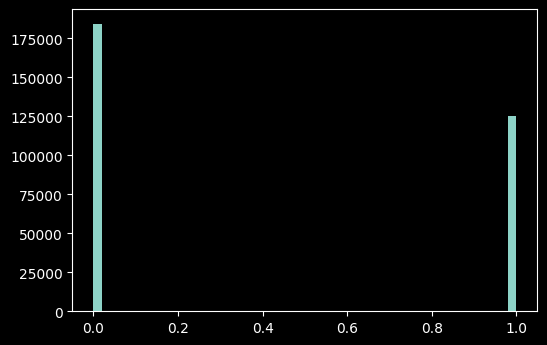

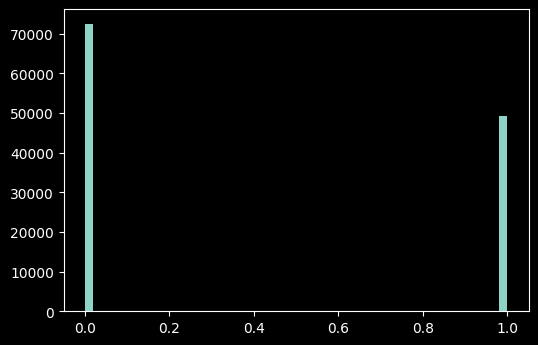

Feature: 1th_nn_Hills


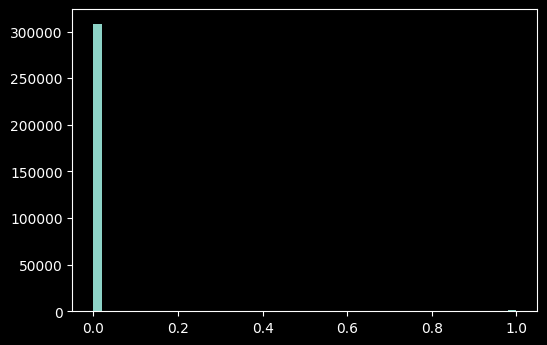

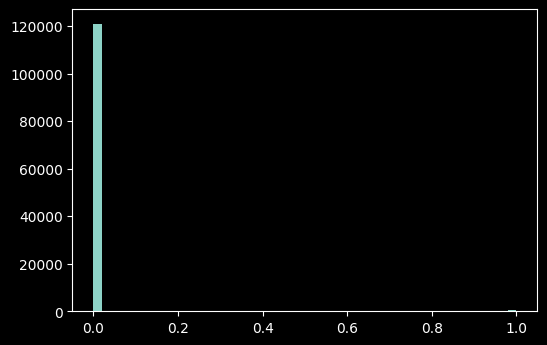

Feature: 1th_nn_Lakes


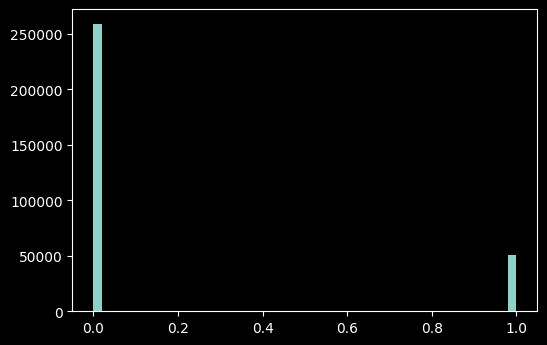

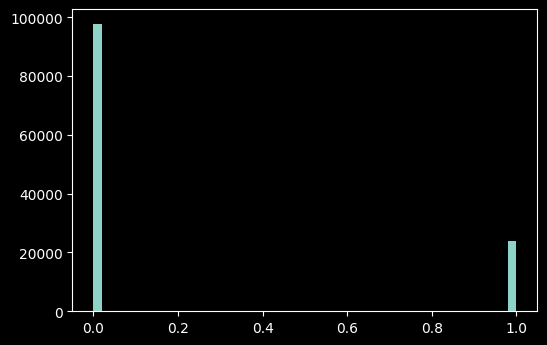

Feature: 1th_nn_None.1


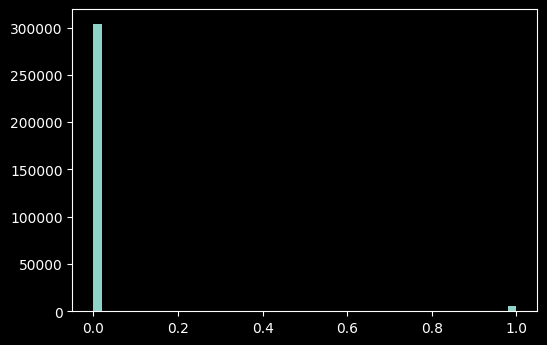

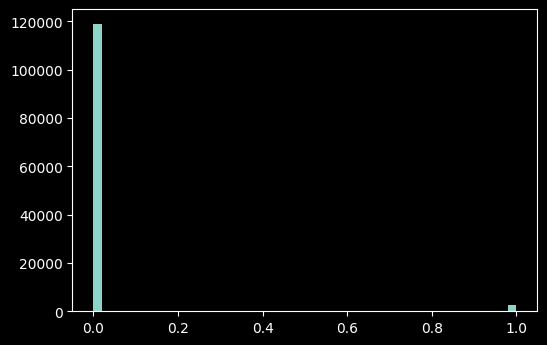

Feature: 1th_nn_River


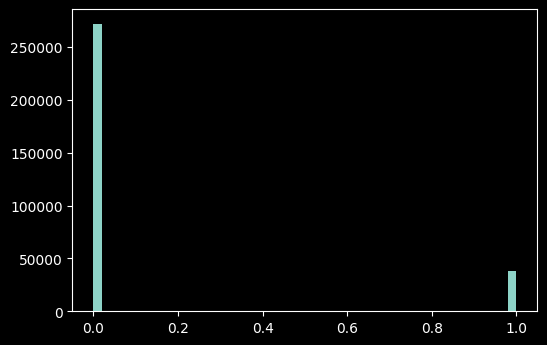

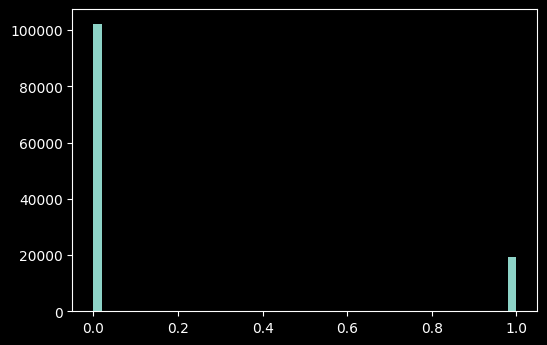

Feature: 1th_nn_Snow


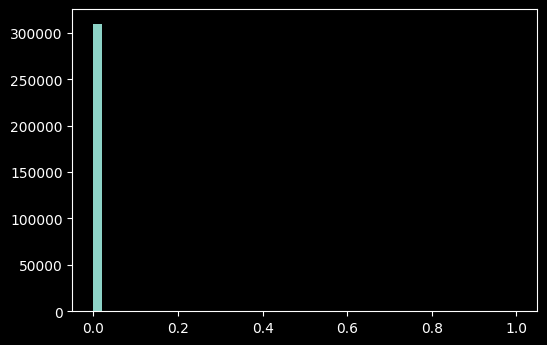

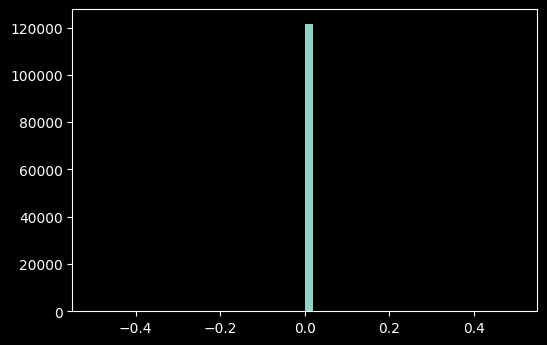

Feature: 1th_nn_Sparse Forest


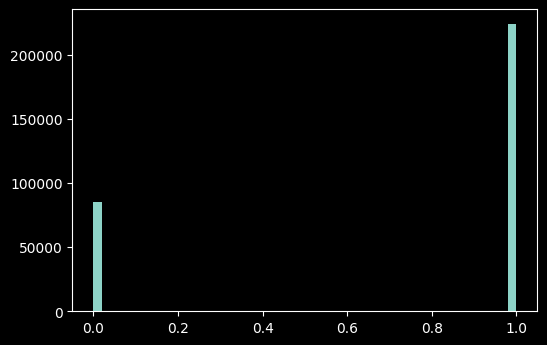

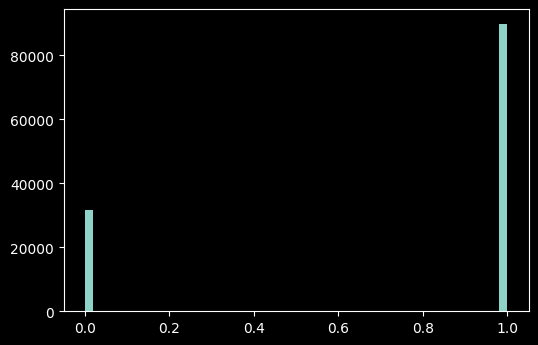

Feature: 1th_nn_diff1


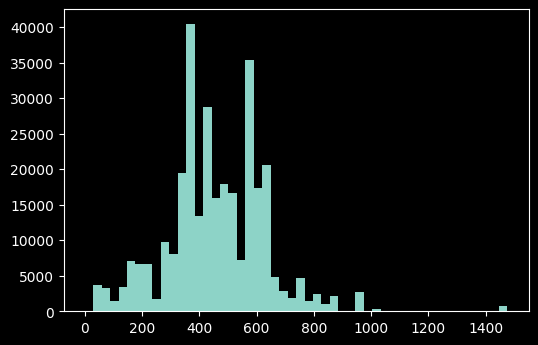

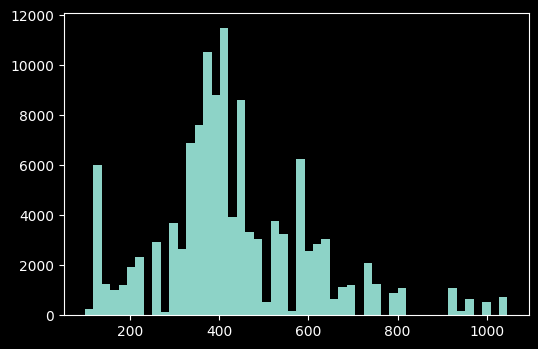

Feature: 1th_nn_diff2


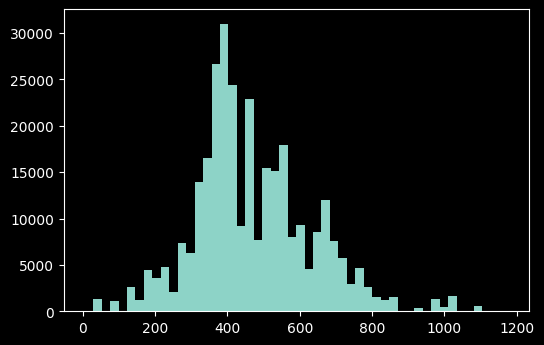

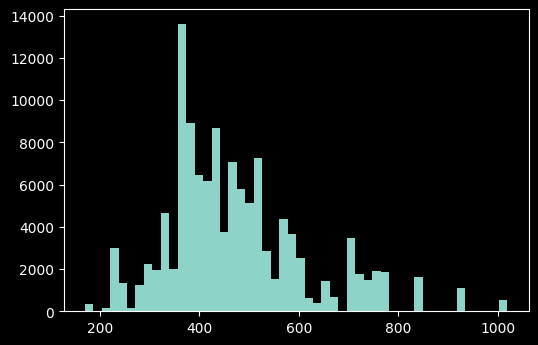

Feature: 1th_nn_diff3


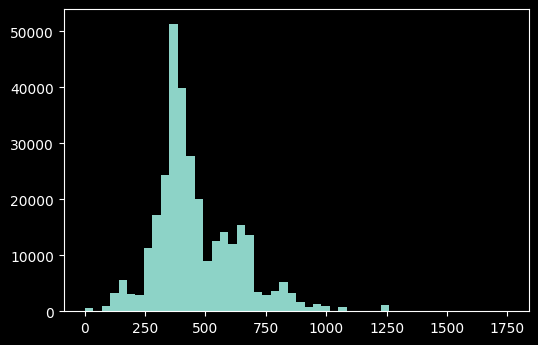

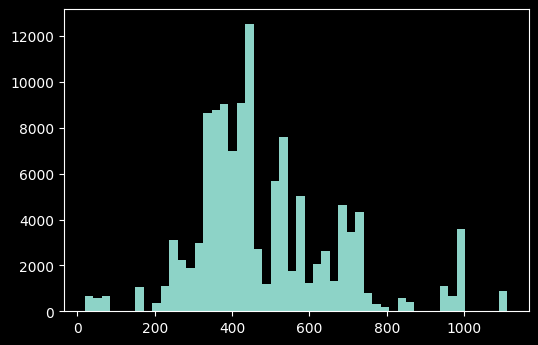

Feature: 1th_nn_diff4


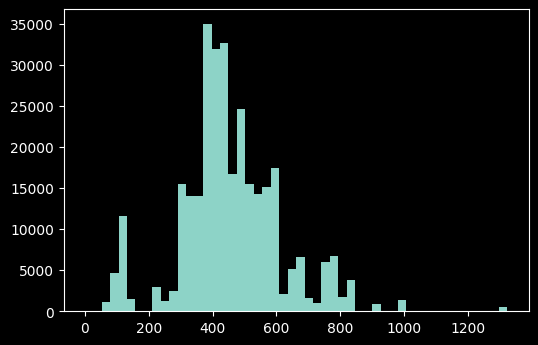

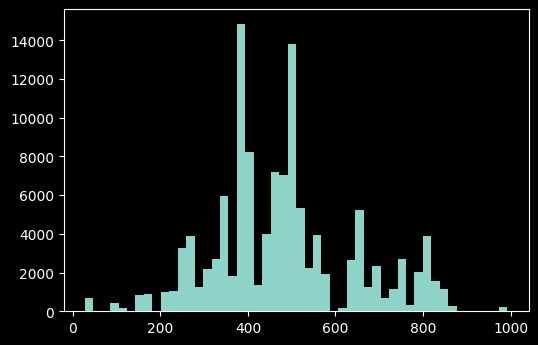

Feature: 1th_nn_year_date1


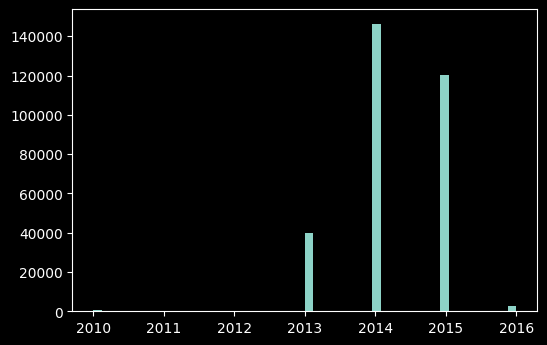

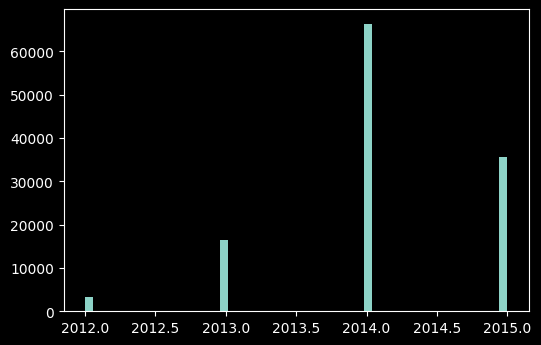

Feature: 1th_nn_year_date2


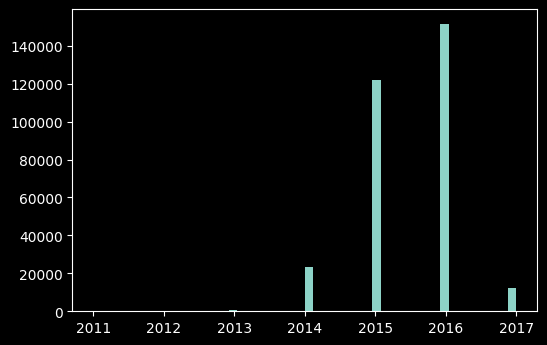

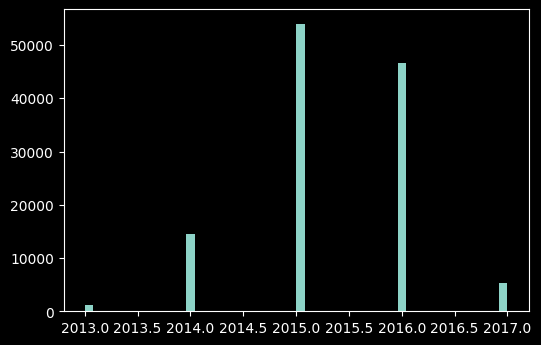

Feature: 1th_nn_year_date3


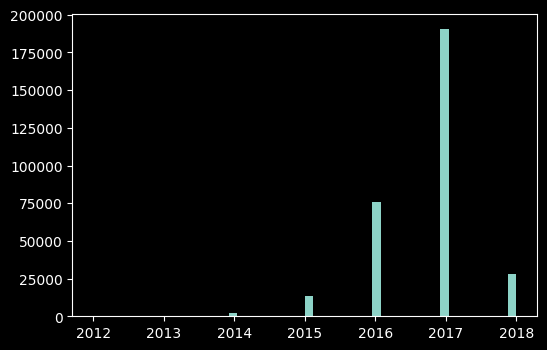

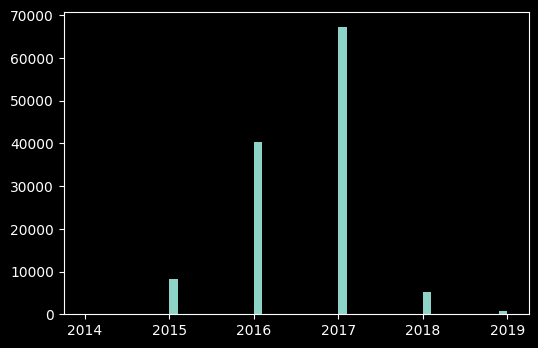

Feature: 1th_nn_year_date4


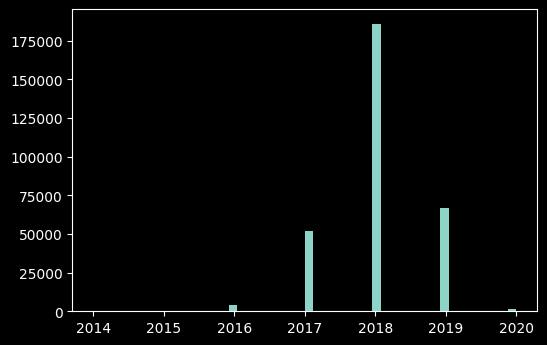

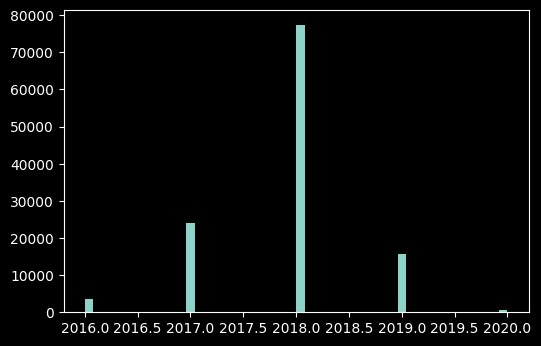

Feature: 1th_nn_year_date5


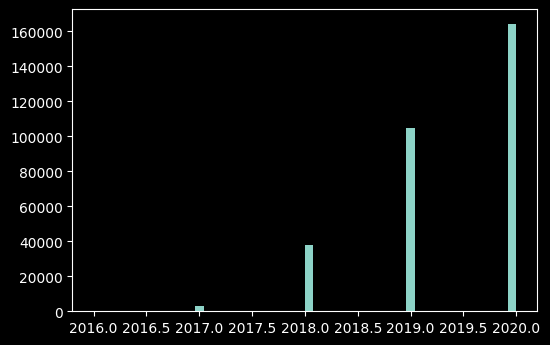

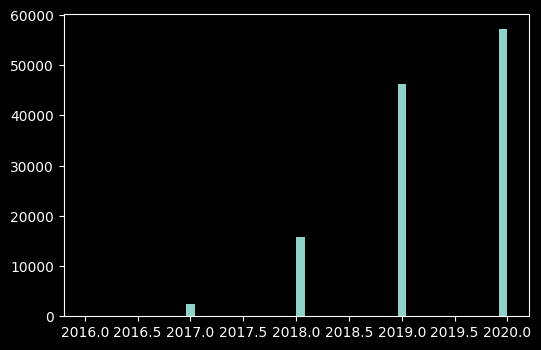

Feature: duration_to_reach1


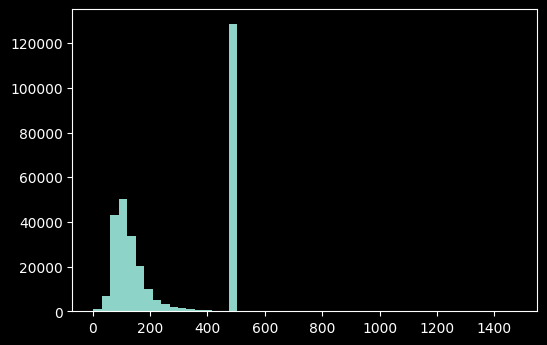

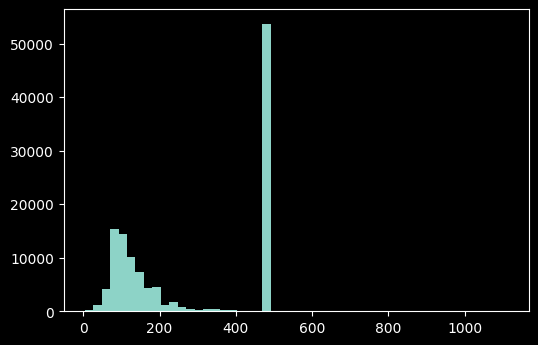

Feature: duration_to_reach2


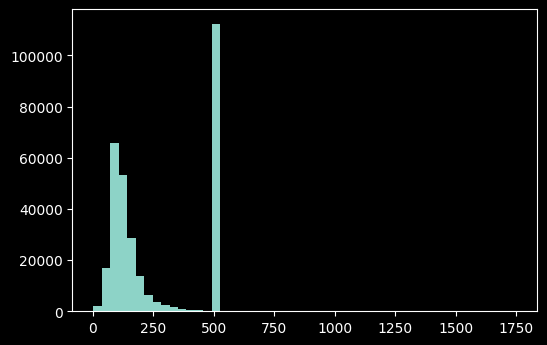

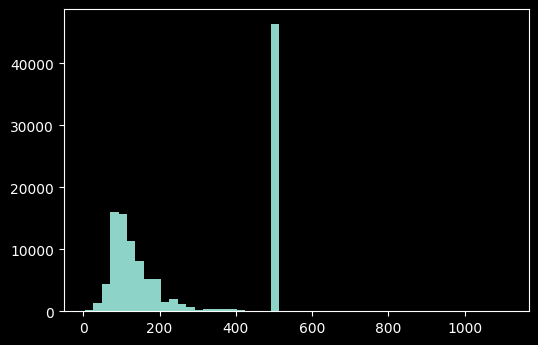

Feature: duration_to_reach3


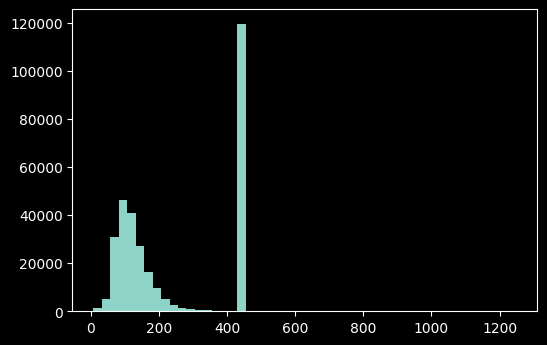

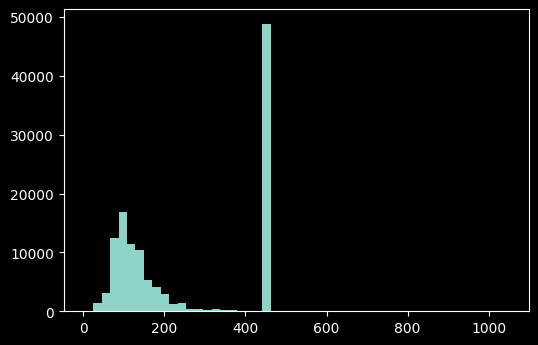

Feature: duration_to_reach4


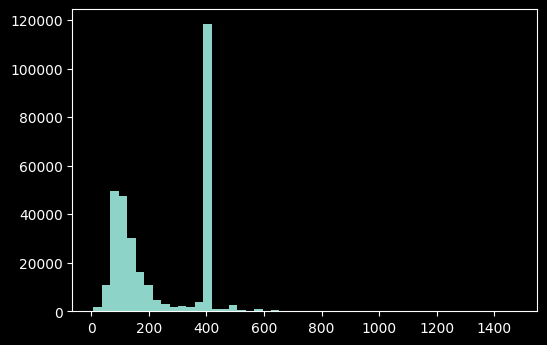

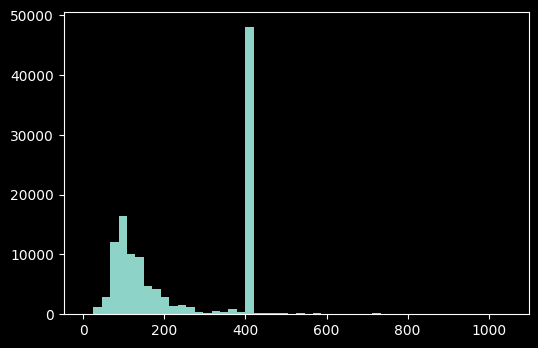

Feature: duration_to_reach5


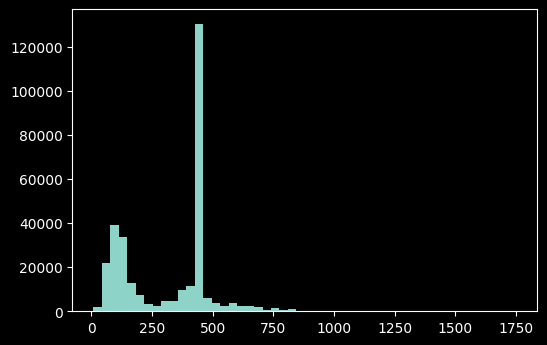

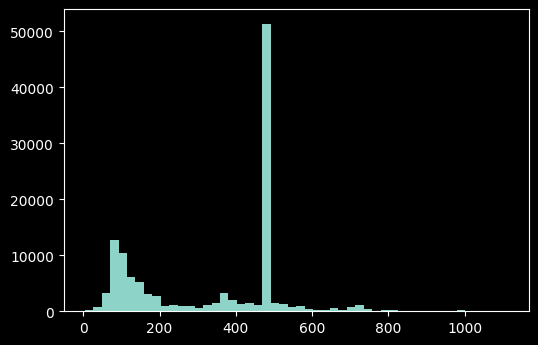

Feature: old1


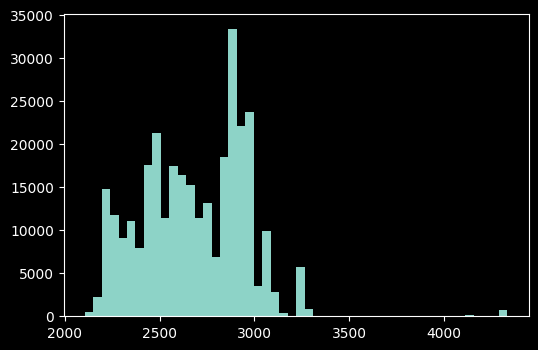

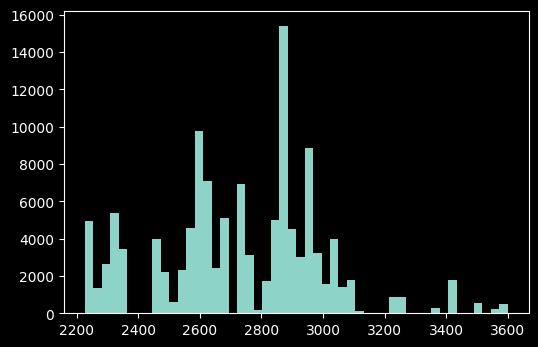

Feature: old2


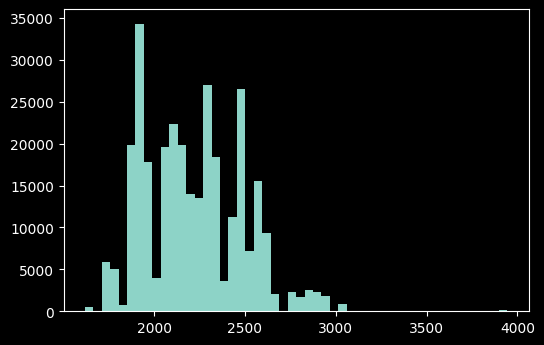

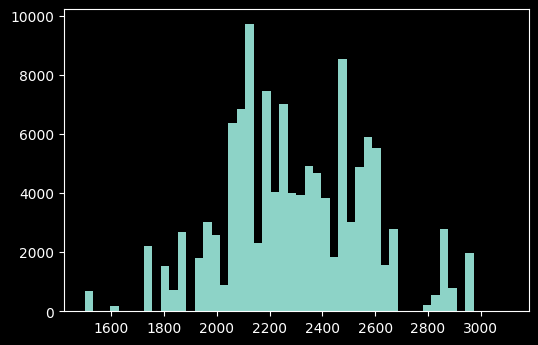

Feature: old3


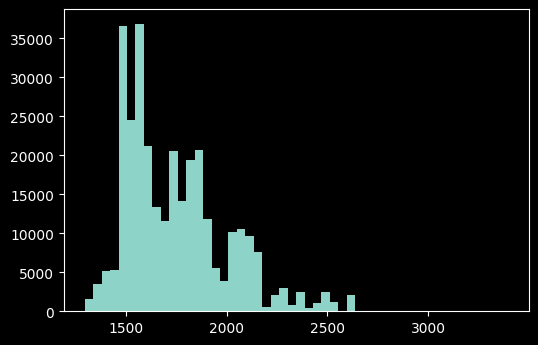

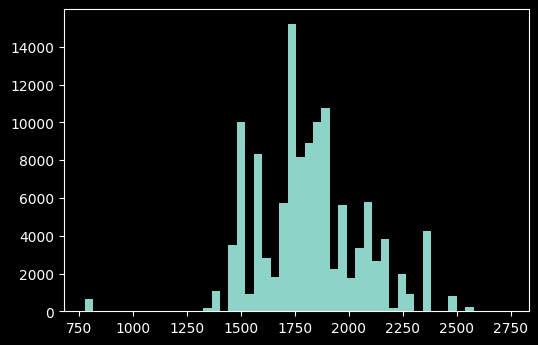

Feature: old4


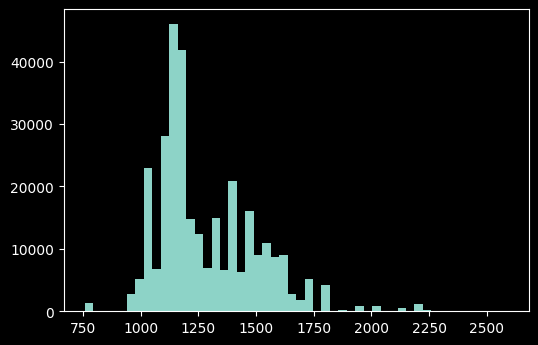

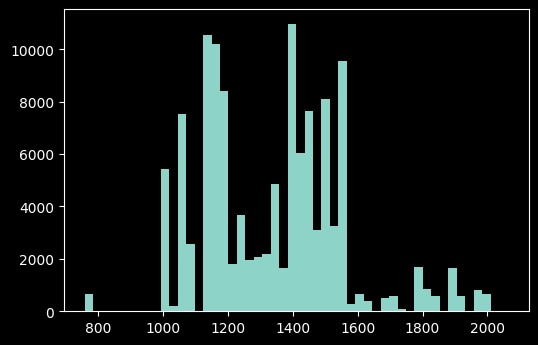

Feature: old5


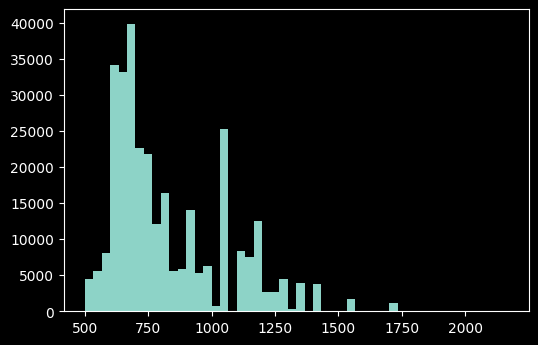

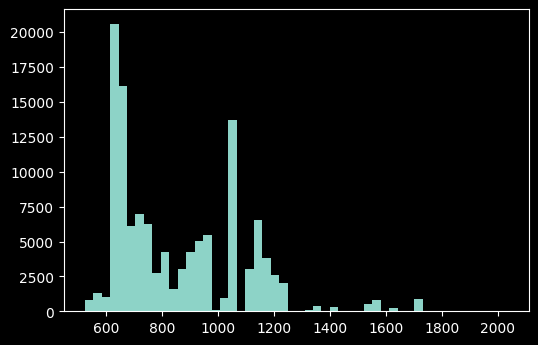

In [34]:
for feature in X.columns:
    print('Feature:', feature)
    plt.hist(X[feature], bins = 50)
    plt.show()
    plt.hist(X_target[feature], bins = 50)
    plt.show()
    